## Udacity Write A Data Science Blog Post Project

## Introduction

This project is part of The [Udacity](https://eu.udacity.com/) Data Scientist Nanodegree Program which is composed by:
- Term 1
    - Supervised Learning
    - Deep Learning
    - Unsupervised Learning
- Term 2
    - Write A Data Science Blog Post
    - Disaster Response Pipelines
    - Recommendation Engines
    
The goal of this project is to put in practice the technical skills teached during the program but manly to focus on the ability to effectively communicate the results of the analysis.
    
The **CRISP-DM** Process (Cross Industry Process for Data Mining):
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy   

### Software and Libraries
This project uses Python 3.7.2 the following libraries:
- NumPy
- Pandas
- nltk
- scikit-learn
- Matplotlib
- seaborn
- TextBlob
- WordCloud

## Business Understanding

Looking at the suggested datasets I was pretty stuck because of the too many options. Then because with some friends we were pondering the idea to transfer in Milan to be closer to our working places I have decided to use Airbnb data to do a sentiment analysis of its neighborhoods. 

Questions:
- Witch are the 5 best scoring neighborhood?
- Witch are the 5 worst scoring neighborhood?
- How much is different the overview of the neighborhood given from the hosts from the one given by the guests?

## Data Understanding

As already said the dataset is provided by [Airbnb](http://insideairbnb.com/get-the-data.html) and is basically composed by:
- **listings.csv**:	Detailed Listings data for Milan
- **calendar.csv**:	Detailed Calendar Data for listings in Milan
- **reviews.csv**:	Detailed Review Data for listings in Milan
- **summary_listings.csv**:	Summary information and metrics for listings in Milan (good for visualisations).
- **summary_reviews.csv**: Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
- **neighbourhoods.csv**: Neighbourhood list for geo filter. Sourced from city or open source GIS files.
- **neighbourhoods.geojson**: GeoJSON file of neighbourhoods of the city.

In [1]:
# Import libraries necessary for this project

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud, ImageColorGenerator


nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Pretty display for notebooks
%matplotlib inline

data_folder = 'data/'

# Load the datasets
df_listings_data = pd.read_csv(data_folder + 'listings.csv')
df_calendar_data = pd.read_csv(data_folder + 'calendar.csv')
df_reviews_data = pd.read_csv(data_folder + 'reviews.csv')
#df_summary_listings_data = pd.read_csv(data_folder + 'summary_listings.csv')
#df_summary_reviews_data = pd.read_csv(data_folder + 'summary_reviews.csv')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\users\simon\google drive\projects\udacity\data_scientist_nanodegree\core_curriculum\term_2\introduction_to_data_science\write_a_data_science_blog_post_project\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df_listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20190411215022,2019-04-12,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The two floors apartment guarantee privacy to ...,"Enjoy your stay at The Studio, a light-filled ...",none,The neighborhood is quiet and very well connec...,...,f,f,flexible_new,f,f,1,0,1,0,0.10
1,23986,https://www.airbnb.com/rooms/23986,20190411215022,2019-04-12,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,In Milano : A comfortable and very quiet typic...,I look forward to welcoming you in my flat; it...,none,NaN,...,f,f,strict_new,f,f,1,1,0,0,0.14
2,28300,https://www.airbnb.com/rooms/28300,20190411215022,2019-04-11,nice flat near the park,Bella camera in appartamento col terrazzo all'...,I rent one room in Milan for short stays . Bre...,I rent one room in Milan for short stays . Bre...,none,la zona è piena di piccoli ristorantini e loca...,...,f,f,flexible_new,f,f,1,0,1,0,0.09
3,32119,https://www.airbnb.com/rooms/32119,20190411215022,2019-04-12,Nico & Cynthia's Easy Yellow Suite,NaN,Do you visit Milan for short periods (training...,Do you visit Milan for short periods (training...,none,NaN,...,f,f,moderate_new,f,f,5,5,0,0,0.14
4,32649,https://www.airbnb.com/rooms/32649,20190411215022,2019-04-12,Nico&Cinzia's Red Easy Suite!,1) Russian people will have 10% discount on si...,Do you visit Milan for short periods (trainin...,1) Russian people will have 10% discount on si...,none,"Flat It's located in north side of milan, jus...",...,f,f,moderate_new,f,f,5,5,0,0,0.26


In [3]:
df_listings_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [4]:
df_listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20626 entries, 0 to 20625
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.7+ MB


In [5]:
df_listings_data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.062600e+04,2.062600e+04,0.0,0.0,0.0,2.062600e+04,0.0,20624.000000,20624.000000,0.0,...,14431.000000,14423.000000,14430.000000,14424.00000,14421.000000,20626.000000,20626.000000,20626.000000,20626.000000,14837.000000
mean,1.881939e+07,2.019041e+13,NaN,NaN,NaN,6.133297e+07,NaN,17.485939,17.485939,NaN,...,9.449311,9.718020,9.731254,9.42152,9.233548,8.669543,8.029186,0.582178,0.058179,1.388353
std,1.064832e+07,0.000000e+00,NaN,NaN,NaN,7.151359e+07,NaN,94.896467,94.896467,NaN,...,0.921397,0.692902,0.702944,0.81547,0.953547,31.397521,31.448641,1.521486,0.552775,1.845296
min,6.400000e+03,2.019041e+13,NaN,NaN,NaN,1.382200e+04,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,8.281163e+06,2.019041e+13,NaN,NaN,NaN,1.009128e+07,NaN,1.000000,1.000000,NaN,...,9.000000,10.000000,10.000000,9.00000,9.000000,1.000000,1.000000,0.000000,0.000000,0.190000
50%,2.009411e+07,2.019041e+13,NaN,NaN,NaN,2.815240e+07,NaN,1.000000,1.000000,NaN,...,10.000000,10.000000,10.000000,10.00000,9.000000,1.000000,1.000000,0.000000,0.000000,0.660000
75%,2.846960e+07,2.019041e+13,NaN,NaN,NaN,9.217115e+07,NaN,3.000000,3.000000,NaN,...,10.000000,10.000000,10.000000,10.00000,10.000000,3.000000,2.000000,1.000000,0.000000,1.840000
max,3.379870e+07,2.019041e+13,NaN,NaN,NaN,2.545967e+08,NaN,1445.000000,1445.000000,NaN,...,10.000000,10.000000,10.000000,10.00000,10.000000,262.000000,262.000000,20.000000,13.000000,18.000000


In [6]:
print("Numerical variables:")

for name, values in df_listings_data.iteritems():
    if(values.dtype == np.float64 or values.dtype == np.int64):
        print(name)

Numerical variables:
id
scrape_id
thumbnail_url
medium_url
xl_picture_url
host_id
host_acceptance_rate
host_listings_count
host_total_listings_count
neighbourhood_group_cleansed
latitude
longitude
accommodates
bathrooms
bedrooms
beds
square_feet
guests_included
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
calculated_host_listings_count
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
reviews_per_month


In [7]:
print("Categorical variables values:")

for name, values in df_listings_data.iteritems():
    if(values.dtype != np.float64 and values.dtype != np.int64):
        print(name)

Categorical variables values:
listing_url
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
picture_url
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
city
state
zipcode
market
smart_location
country_code
country
is_location_exact
property_type
room_type
bed_type
amenities
price
weekly_price
monthly_price
security_deposit
cleaning_fee
extra_people
calendar_updated
has_availability
calendar_last_scraped
first_review
last_review
requires_license
license
jurisdiction_names
instant_bookable
is_business_travel_ready
cancellation_policy
require_guest_profile_picture
require_guest_phone_verification


In [8]:
for name, values in df_listings_data.iteritems():
    if(values.dtype != np.float64 and values.dtype != np.int64):
        print('{name}: {value}\n'.format(name=name, value=values.unique()))

listing_url: ['https://www.airbnb.com/rooms/6400' 'https://www.airbnb.com/rooms/23986'
 'https://www.airbnb.com/rooms/28300' ...
 'https://www.airbnb.com/rooms/33797933'
 'https://www.airbnb.com/rooms/33798066'
 'https://www.airbnb.com/rooms/33798696']

last_scraped: ['2019-04-12' '2019-04-11']

name: ['The Studio Milan' '" Characteristic Milanese flat"'
 'nice flat near the park' ... 'Appartamento zona 5 giornate'
 'Bocconi Apartment' 'Stanza privata con letto matrimoniale']

summary: ['Enjoy your stay at The Studio, a light-filled two floors apartment with balconies in a quiet area of south Milan, 10 min distance from Navigli and Tortona area, and very well connected to the center'
 'I look forward to welcoming you in my flat; it is suitable for couples and groups of up to 4 people'
 "Bella camera in appartamento col terrazzo all'arco della pace, zona piena di locali e ristoranti,  nella camera e' presente un tapis roulant tecnogym. gli ospiti possono utilizzare la cucina. abbiamo du

price: ['$100.00' '$150.00' '$200.00' '$70.00' '$55.00' '$88.00' '$290.00'
 '$60.00' '$125.00' '$95.00' '$700.00' '$71.00' '$140.00' '$50.00'
 '$280.00' '$90.00' '$75.00' '$250.00' '$120.00' '$300.00' '$27.00'
 '$40.00' '$600.00' '$500.00' '$188.00' '$195.00' '$235.00' '$180.00'
 '$28.00' '$65.00' '$80.00' '$17.00' '$31.00' '$79.00' '$110.00' '$98.00'
 '$54.00' '$45.00' '$41.00' '$53.00' '$35.00' '$130.00' '$22.00' '$59.00'
 '$400.00' '$30.00' '$96.00' '$38.00' '$240.00' '$81.00' '$135.00'
 '$320.00' '$220.00' '$85.00' '$84.00' '$450.00' '$21.00' '$143.00'
 '$99.00' '$58.00' '$62.00' '$39.00' '$34.00' '$66.00' '$73.00' '$29.00'
 '$93.00' '$170.00' '$37.00' '$72.00' '$350.00' '$32.00' '$109.00'
 '$42.00' '$139.00' '$233.00' '$145.00' '$25.00' '$49.00' '$265.00'
 '$78.00' '$105.00' '$160.00' '$48.00' '$51.00' '$74.00' '$26.00' '$69.00'
 '$20.00' '$61.00' '$83.00' '$43.00' '$82.00' '$89.00' '$33.00' '$283.00'
 '$179.00' '$63.00' '$19.00' '$190.00' '$149.00' '$64.00' '$18.00'
 '$52.00' '$6

calendar_last_scraped: ['2019-04-12' '2019-04-11']

first_review: ['2010-04-19' '2012-04-24' '2012-04-22' ... '2019-03-07' '2019-02-09'
 '2019-03-20']

last_review: ['2018-04-21' '2018-04-22' '2015-10-25' ... '2018-03-20' '2018-05-17'
 '2018-04-11']

requires_license: ['f']

license: [nan '740764' '015146-CIM-00363' '42' '8' '85' '86' '18' '15' '46' '7'
 '78' '3' '015146-CIM-00513' '015146-CIM-00937' '015146-CIM-00938'
 '015146-CIM-00939' '015146-CIM-00940' 'PROTOCOLLO N.145325/2018'
 'Not needed' '05724640650' '015146-CIM-00911' 'no needed'
 '015146-CIM-01256' 'not required' 'No requested' 'NOT REQUESTED'
 '03784860987' 'Not required']

jurisdiction_names: ['{Milan," Italia"}' nan]

instant_bookable: ['f' 't']

is_business_travel_ready: ['f']

cancellation_policy: ['flexible_new' 'strict_new' 'moderate_new' 'super_strict_60_new'
 'super_strict_30_new']

require_guest_profile_picture: ['f' 't']

require_guest_phone_verification: ['f' 't']



In [9]:
df_calendar_data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,256390,2019-04-12,f,$360.00,$360.00,3.0,60.0
1,256390,2019-04-13,f,$360.00,$360.00,3.0,60.0
2,256390,2019-04-14,f,$360.00,$360.00,3.0,60.0
3,256390,2019-04-15,f,$135.00,$135.00,3.0,60.0
4,256390,2019-04-16,t,$135.00,$135.00,3.0,60.0


In [10]:
df_calendar_data.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [11]:
df_calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522434 entries, 0 to 7522433
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 401.7+ MB


In [12]:
df_calendar_data.describe()

,listing_id,minimum_nights,maximum_nights
count,7.522434e+06,7.516284e+06,7.516284e+06
mean,1.881674e+07,2.783449e+01,1.858327e+05
std,1.064746e+07,3.484232e+03,1.714814e+07
min,6.400000e+03,1.000000e+00,1.000000e+00
25%,8.277818e+06,1.000000e+00,2.800000e+01
50%,2.008681e+07,2.000000e+00,3.650000e+02
75%,2.846318e+07,2.000000e+00,1.125000e+03
max,3.379870e+07,5.000000e+05,2.147484e+09


In [13]:
print("Numerical variables:")

for name, values in df_calendar_data.iteritems():
    if(values.dtype == np.float64 or values.dtype == np.int64):
        print(name)

Numerical variables:
listing_id
minimum_nights
maximum_nights


In [14]:
print("Categorical variables values:")

for name, values in df_calendar_data.iteritems():
    if(values.dtype != np.float64 and values.dtype != np.int64):
        print(name)

Categorical variables values:
date
available
price
adjusted_price


In [15]:
for name, values in df_calendar_data.iteritems():
    if(values.dtype != np.float64 and values.dtype != np.int64):
        print('{name}: {value}\n'.format(name=name, value=values.unique()))

date: ['2019-04-12' '2019-04-13' '2019-04-14' '2019-04-15' '2019-04-16'
 '2019-04-17' '2019-04-18' '2019-04-19' '2019-04-20' '2019-04-21'
 '2019-04-22' '2019-04-23' '2019-04-24' '2019-04-25' '2019-04-26'
 '2019-04-27' '2019-04-28' '2019-04-29' '2019-04-30' '2019-05-01'
 '2019-05-02' '2019-05-03' '2019-05-04' '2019-05-05' '2019-05-06'
 '2019-05-07' '2019-05-08' '2019-05-09' '2019-05-10' '2019-05-11'
 '2019-05-12' '2019-05-13' '2019-05-14' '2019-05-15' '2019-05-16'
 '2019-05-17' '2019-05-18' '2019-05-19' '2019-05-20' '2019-05-21'
 '2019-05-22' '2019-05-23' '2019-05-24' '2019-05-25' '2019-05-26'
 '2019-05-27' '2019-05-28' '2019-05-29' '2019-05-30' '2019-05-31'
 '2019-06-01' '2019-06-02' '2019-06-03' '2019-06-04' '2019-06-05'
 '2019-06-06' '2019-06-07' '2019-06-08' '2019-06-09' '2019-06-10'
 '2019-06-11' '2019-06-12' '2019-06-13' '2019-06-14' '2019-06-15'
 '2019-06-16' '2019-06-17' '2019-06-18' '2019-06-19' '2019-06-20'
 '2019-06-21' '2019-06-22' '2019-06-23' '2019-06-24' '2019-06-25'
 '20

In [16]:
df_reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A..."


In [17]:
df_reviews_data.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [18]:
df_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469653 entries, 0 to 469652
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     469653 non-null  int64 
 1   id             469653 non-null  int64 
 2   date           469653 non-null  object
 3   reviewer_id    469653 non-null  int64 
 4   reviewer_name  469653 non-null  object
 5   comments       469460 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.5+ MB


In [19]:
df_reviews_data.describe()

,listing_id,id,reviewer_id
count,4.696530e+05,4.696530e+05,4.696530e+05
mean,1.135851e+07,2.032843e+08,6.727041e+07
std,8.265585e+06,1.215842e+08,6.152010e+07
min,6.400000e+03,3.677200e+04,1.370000e+02
25%,4.805834e+06,9.896753e+07,1.872390e+07
50%,8.898314e+06,2.010339e+08,4.493458e+07
75%,1.790650e+07,3.005600e+08,1.042420e+08
max,3.372519e+07,4.358513e+08,2.543072e+08


In [20]:
print("Numerical variables:")

for name, values in df_reviews_data.iteritems():
    if(values.dtype == np.float64 or values.dtype == np.int64):
        print(name)

Numerical variables:
listing_id
id
reviewer_id


In [21]:
print("Categorical variables values:")

for name, values in df_reviews_data.iteritems():
    if(values.dtype != np.float64 and values.dtype != np.int64):
        print(name)

Categorical variables values:
date
reviewer_name
comments


In [22]:
for name, values in df_reviews_data.iteritems():
    if(values.dtype != np.float64 and values.dtype != np.int64):
        print('{name}: {value}\n'.format(name=name, value=values.unique()))

date: ['2010-04-19' '2011-04-16' '2012-04-22' ... '2018-05-02' '2015-10-23'
 '2016-03-07']

reviewer_name: ['Hyun' 'Tej' 'Isabelle' ... '誉卓' 'Giulia Yoga' '筱晴']

comments: ["I had such a great stay at 'the studio.'  Francesca and Alberto are terrific hosts...not only did they provide maps with great suggestions of places and things to see, their warmth and friendly nature really made me feel at home in their place.  Their home is right off one of the above ground trams that leads to the duome in like 12 minutes!  I would highly recommend this place!"
 "Staying at Francesca's and Alberto's place was a pleasure. Just as described, well located for my purposes, an enjoyable walk to the Tortona area. The room is very nice, cleaned daily and has private bathroom.\r\n\r\nFrancesca is super friendly and very helpful; whilst still respecting privacy.\r\n\r\nOverall a great experience!\r\n"
 "This is my second time staying with Francesca and her family; as last year, it was a perfect stay. The 

## Data Preparation and Data Modeling

Now looking at the columns of the datasets we can figure out which of them can be usefull to answer our questions, of course for our goal the main focus is on the neighbourhoods:

In [23]:
df_listings_data_cleaned = df_listings_data[['id'
                                             #, 'name'
                                             #, 'summary'
                                             #, 'space'
                                             #, 'description'
                                             , 'neighborhood_overview'
                                             #, 'transit'
                                             #, 'access'
                                             #, 'interaction'
                                             #, 'house_rules'
                                             #, 'host_about'
                                             #, 'host_neighbourhood'
                                             #, 'neighbourhood'
                                             , 'neighbourhood_cleansed']]

df_listings_data_cleaned.head()

,id,neighborhood_overview,neighbourhood_cleansed
0,6400,The neighborhood is quiet and very well connec...,TIBALDI
1,23986,NaN,NAVIGLI
2,28300,la zona è piena di piccoli ristorantini e loca...,SARPI
3,32119,NaN,VIALE MONZA
4,32649,"Flat It's located in north side of milan, jus...",VIALE MONZA


In [24]:
df_listings_data_cleaned.shape

(20626, 3)

In [25]:
#len(df_listings_data_cleaned['id'].unique())

In [26]:
# Set 'id' as key in the dataframe

#df_listings_data_cleaned.set_index('id', inplace = True)

In [27]:
#df_listings_data_cleaned.head()

<AxesSubplot:>

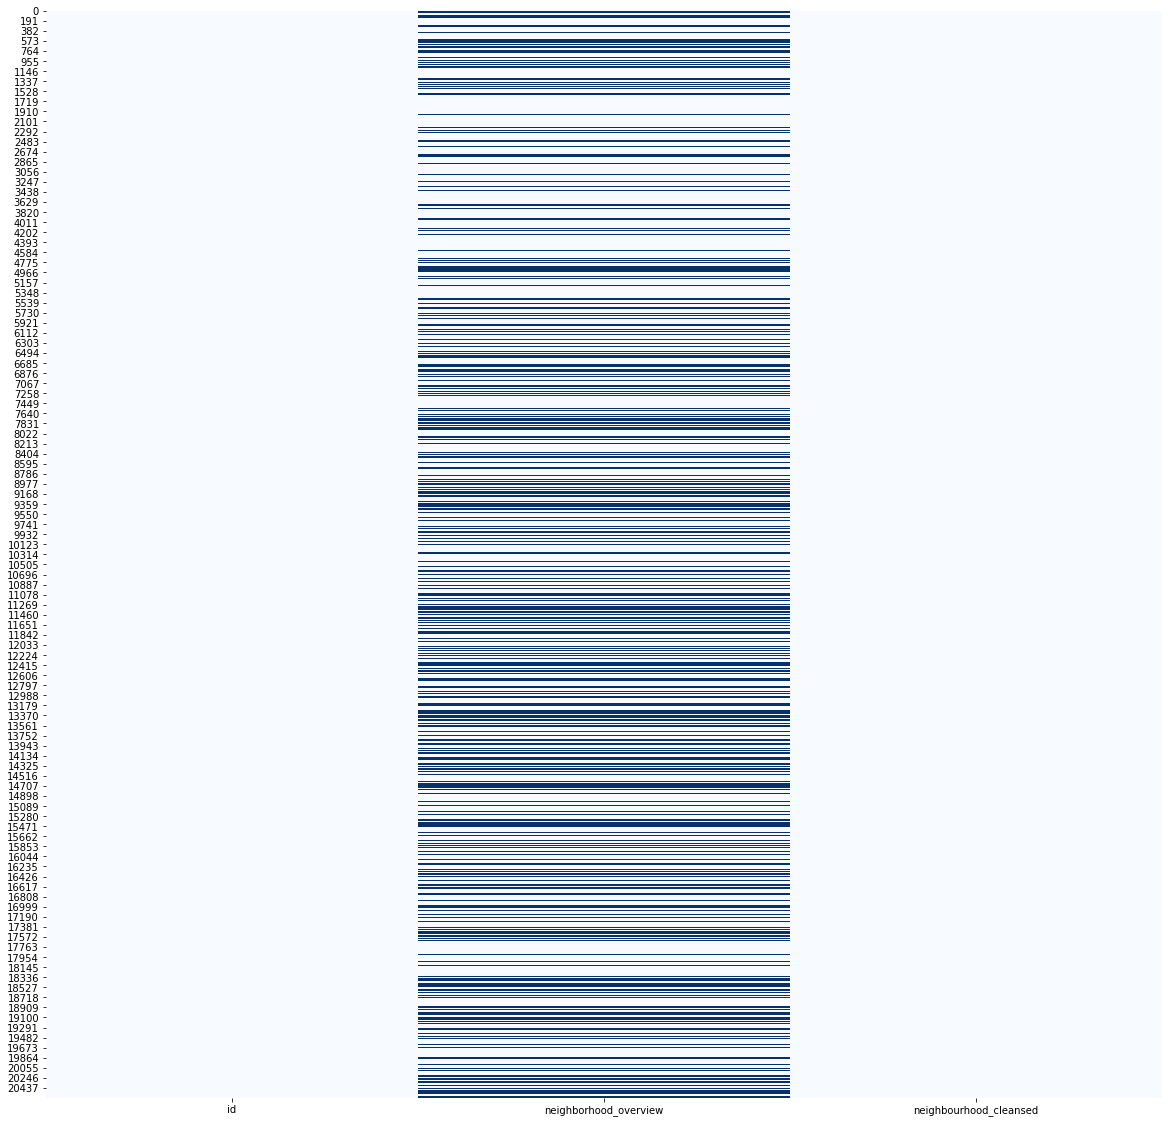

In [28]:
# Heatmap of the missing values

plt.figure(figsize = (20, 20))
sns.heatmap(df_listings_data_cleaned.isnull(), cmap = 'Blues', cbar = False)

In [29]:
len(df_listings_data['neighbourhood_cleansed'].unique())

85

There are only 85 **neighbourhood_cleansed** unique entry.

In [30]:
list_neighbourhood = list(df_listings_data['neighbourhood_cleansed'].unique())
list_neighbourhood = [neighbourhood.lower() for neighbourhood in list_neighbourhood]

print(list_neighbourhood)

['tibaldi', 'navigli', 'sarpi', 'viale monza', 'guastalla', 'ticinese', 'baggio', 'buenos aires - venezia', 'giambellino', 'centrale', 'xxii marzo', 'brera', 'duomo', 'isola', 'bande nere', 'washington', 'porta romana', 'lambrate', 'selinunte', 'villapizzone', 'maciachini - maggiolina', "citta' studi", 'adriano', 'stadera', 's. siro', 's. cristoforo', 'parco lambro - cimiano', 'padova', 'corsica', 'ortomercato', 'rogoredo', 'loreto', 'de angeli - monte rosa', 'bovisa', 'vigentina', 'ghisolfa', 'bovisasca', 'tortona', 'lorenteggio', 'umbria - molise', 'gratosoglio - ticinello', 'garibaldi repubblica', 'magenta - s. vittore', 'portello', 'sacco', 'pagano', 'parco forlanini - ortica', 'lodi - corvetto', 'tre torri', 'ripamonti', 'forze armate', 'barona', 'dergano', 'farini', 'scalo romana', "niguarda - ca' granda", 'greco', 'qt 8', 'giardini porta venezia', 'quarto oggiaro', 'maggiore - musocco', 'bruzzano', 'parco sempione', 'ex om - morivione', 'quinto romano', 'comasina', 'ronchetto su

Searching online for [Milan's neighbourhoods](http://www.museomilano.it/mediateca/media-pg-5/) and after some data cleaning we have this list of 130 neighbourhoods:
- ticinese
- magenta
- porta vercellina
- cordusio
- carrobbio
- cinquevie
- sant’ambrogio
- verziere
- san babila
- brolo-pantano
- duomo
- castello
- sempione
- brera
- borgo degli ortolani - chinatown
- porta nuova
- centrale
- centro direzionale
- porta garibaldi
- porta venezia
- risorgimento
- porta vittoria
- porta romana
- citta’ studi
- acquabella
- porta monforte
- calvairate
- lazio
- tertulliano
- porta vigentina
- porta genova
- porta lodovica
- bullona
- taliedo mecenate
- morsenchio
- gamboloita
- castagnedo
- vigentino
- corvetto
- nosedo
- santa giulia
- rogoredo
- triulzo superiore
- ponte lambro
- forlanini
- monluè
- guastalla
- ortica
- cavriano
- lambrate
- loreto
- abadesse
- ponte seveso
- isola
- tortona
- washington
- solari
- navigli
- san pietro
- la maddalena
- pagano
- fopponino
- lotto
- molinazzo
- vaiano valle
- selvanesco
- moncucco
- san cristoforo
- lorenteggio giambellino
- primaticcio 
- arzaga
- forze armate
- bisceglie
- quarto cagnino
- quinto romano
- baggio
- muggiano
- trenno
- figino
- lampugnano
- gallaratese
- cascina merlata
- certosa
- qt8
- san siro
- portello
- cagnola
- musocco
- roserio
- vialba
- ronchetto sul naviglio
- barona
- boffalora
- chiesa rossa
- conca fallata
- cantalupa
- gratosoglio
- macconago
- quintosole
- morivione
- chiaravalle
- casoretto
- greco
- bicocca
- prato centenario
- gorla
- precotto
- villa san giovanni
- adriano
- crescenzago
- rottole
- turro
- maggiolina
- montalbino
- niguarda
- tre torri
- dergano
- affori 
- bovisasca
- comasina
- bruzzano
- bovisa 
- villa pizzone
- quarto oggiaro
- farini 
- la fontana
- ronchetto delle rane
- conchetta
- porta volta
- ghisolfa

![title](img/quartieri_milano.jpg)

As we can see not all the neighbourhoods are rappresented in the dataset and moreover there is not an exact mapping between the dataset and the real neighbourhoods.

In [31]:
list_real_neighbourhood = []

with open('quartieri.txt', 'r') as file:  
    for line in file:
        item = line.replace('\n','') # remove linebreak
        list_real_neighbourhood.append(item)
        
print(len(list_real_neighbourhood))

#print(list_real_neighbourhood)

130


In [32]:
def is_present(item, lista):
    for elemento in lista:
        if elemento in item or item in elemento:
            return elemento
    return False

lista = ['pippo', 'pluto', 'paperino']
print(is_present('paperino', lista))

paperino


In [33]:
list_mapping_neighbourhood_real_neighbourhood = []
list_no_matched_data_neighbourhood_by_real_neighbourhood = []
list_no_matched_real_neighbourhood_by_data_neighbourhood = []

for neighbourhood in list_neighbourhood:
    real_neighbourhood = is_present(neighbourhood, list_real_neighbourhood)
    if real_neighbourhood == False:
        list_no_matched_data_neighbourhood_by_real_neighbourhood.append(neighbourhood)
    else:
        list_mapping_neighbourhood_real_neighbourhood.append((neighbourhood, real_neighbourhood))       

In [34]:
list_mapping_neighbourhood_real_neighbourhood

[('navigli', 'navigli'),
 ('guastalla', 'guastalla'),
 ('ticinese', 'ticinese'),
 ('baggio', 'baggio'),
 ('giambellino', 'lorenteggio giambellino'),
 ('centrale', 'centrale'),
 ('brera', 'brera'),
 ('duomo', 'duomo'),
 ('isola', 'isola'),
 ('washington', 'washington'),
 ('porta romana', 'porta romana'),
 ('lambrate', 'lambrate'),
 ('maciachini - maggiolina', 'maggiolina'),
 ("citta' studi", "citta' studi"),
 ('adriano', 'adriano'),
 ('rogoredo', 'rogoredo'),
 ('loreto', 'loreto'),
 ('bovisa', 'bovisasca'),
 ('vigentina', 'porta vigentina'),
 ('ghisolfa', 'ghisolfa'),
 ('bovisasca', 'bovisasca'),
 ('tortona', 'tortona'),
 ('lorenteggio', 'lorenteggio giambellino'),
 ('gratosoglio - ticinello', 'gratosoglio'),
 ('magenta - s. vittore', 'magenta'),
 ('portello', 'portello'),
 ('pagano', 'pagano'),
 ('parco forlanini - ortica', 'forlanini'),
 ('lodi - corvetto', 'corvetto'),
 ('tre torri', 'tre torri'),
 ('forze armate', 'forze armate'),
 ('barona', 'barona'),
 ('dergano', 'dergano'),
 ('f

By checking the association made by our funciton we can see some errors that we must correct:

In [35]:
# Update wrong association ('ronchetto sul naviglio', 'navigli') and ('bovisa', 'bovisasca'),

list_mapping_neighbourhood_real_neighbourhood_correct = []

for i in range(len(list_mapping_neighbourhood_real_neighbourhood)):
    if list_mapping_neighbourhood_real_neighbourhood[i][0] == 'ronchetto sul naviglio':
        list_mapping_neighbourhood_real_neighbourhood_correct.append(('ronchetto sul naviglio', 'ronchetto sul naviglio'))
    elif list_mapping_neighbourhood_real_neighbourhood[i][0] == 'bovisa':
        list_mapping_neighbourhood_real_neighbourhood_correct.append(('bovisa', 'bovisa'))
    else:
        list_mapping_neighbourhood_real_neighbourhood_correct.append(list_mapping_neighbourhood_real_neighbourhood[i])
        
list_mapping_neighbourhood_real_neighbourhood = list_mapping_neighbourhood_real_neighbourhood_correct
list_mapping_neighbourhood_real_neighbourhood

[('navigli', 'navigli'),
 ('guastalla', 'guastalla'),
 ('ticinese', 'ticinese'),
 ('baggio', 'baggio'),
 ('giambellino', 'lorenteggio giambellino'),
 ('centrale', 'centrale'),
 ('brera', 'brera'),
 ('duomo', 'duomo'),
 ('isola', 'isola'),
 ('washington', 'washington'),
 ('porta romana', 'porta romana'),
 ('lambrate', 'lambrate'),
 ('maciachini - maggiolina', 'maggiolina'),
 ("citta' studi", "citta' studi"),
 ('adriano', 'adriano'),
 ('rogoredo', 'rogoredo'),
 ('loreto', 'loreto'),
 ('bovisa', 'bovisa'),
 ('vigentina', 'porta vigentina'),
 ('ghisolfa', 'ghisolfa'),
 ('bovisasca', 'bovisasca'),
 ('tortona', 'tortona'),
 ('lorenteggio', 'lorenteggio giambellino'),
 ('gratosoglio - ticinello', 'gratosoglio'),
 ('magenta - s. vittore', 'magenta'),
 ('portello', 'portello'),
 ('pagano', 'pagano'),
 ('parco forlanini - ortica', 'forlanini'),
 ('lodi - corvetto', 'corvetto'),
 ('tre torri', 'tre torri'),
 ('forze armate', 'forze armate'),
 ('barona', 'barona'),
 ('dergano', 'dergano'),
 ('fari

In [36]:
for neighbourhood in list_real_neighbourhood:
    if neighbourhood not in [element[1] for element in list_mapping_neighbourhood_real_neighbourhood]:
        list_no_matched_real_neighbourhood_by_data_neighbourhood.append(neighbourhood)
        
print(len(list_mapping_neighbourhood_real_neighbourhood))
print(len(list_no_matched_data_neighbourhood_by_real_neighbourhood))
print(len(list_no_matched_real_neighbourhood_by_data_neighbourhood))

60
25
72


In [37]:
print(list_no_matched_data_neighbourhood_by_real_neighbourhood)

['tibaldi', 'sarpi', 'viale monza', 'buenos aires - venezia', 'xxii marzo', 'bande nere', 'selinunte', 'villapizzone', 'stadera', 's. siro', 's. cristoforo', 'parco lambro - cimiano', 'padova', 'corsica', 'ortomercato', 'de angeli - monte rosa', 'umbria - molise', 'garibaldi repubblica', 'sacco', 'ripamonti', 'scalo romana', 'qt 8', 'parco bosco in citt\x85', 'parco delle abbazie', 'parco nord']


In [38]:
print(list_no_matched_real_neighbourhood_by_data_neighbourhood)

['porta vercellina', 'cordusio', 'carrobbio', 'cinquevie', "sant'ambrogio", 'verziere', 'san babila', 'brolo-pantano', 'castello', 'borgo degli ortolani - chinatown', 'porta nuova', 'centro direzionale', 'porta garibaldi', 'risorgimento', 'porta vittoria', 'acquabella', 'porta monforte', 'calvairate', 'lazio', 'tertulliano', 'porta genova', 'porta lodovica', 'bullona', 'morsenchio', 'gamboloita', 'castagnedo', 'vigentino', 'nosedo', 'santa giulia', 'monluÃ¨', 'ortica', 'cavriano', 'abadesse', 'ponte seveso', 'solari', 'san pietro', 'la maddalena', 'fopponino', 'lotto', 'molinazzo', 'vaiano valle', 'selvanesco', 'moncucco', 'san cristoforo', 'primaticcio', 'arzaga', 'bisceglie', 'lampugnano', 'cascina merlata', 'certosa', 'qt8', 'san siro', 'cagnola', 'roserio', 'vialba', 'boffalora', 'chiesa rossa', 'conca fallata', 'macconago', 'casoretto', 'prato centenario', 'gorla', 'precotto', 'villa san giovanni', 'crescenzago', 'rottole', 'turro', 'montalbino', 'villa pizzone', 'la fontana', 'co

Let's do by hand the mapping of this no matched neighbourhood with the help of Google Maps:

|     Data               |     Real                         |
|------------------------|----------------------------------| 
| bande nere             | primaticcio                      |
| buenos aires - venezia | porta venezia                    |
| corsica                | acquabella                       |
| de angeli - monte rosa | tre torri                        |
| garibaldi repubblica   | porta garibaldi                  |
| ortomercato            | calvairate                       |
| padova                 | isola                            |
| parco bosco in città   | quinto romano                    |
| parco delle abbazie    | vaiano valle                     |
| parco lambro - cimiano | lambrate                         |
| parco nord             | bicocca                          |
| qt 8                   | qt8                              |
| ripamonti              | vigentino                        |
| s. cristoforo          | san cristoforo                   |
| s. siro                | san siro                         |
| sacco                  | vialba                           |
| sarpi                  | borgo degli ortolani - chinatown |
| scalo romana           | vigentino                        |
| selinunte              | san siro                         |
| stadera                | chiesa rossa                     |
| tibaldi                | conchetta                        |
| umbria - molise        | calvairate                       |
| viale monza            | gorla                            |
| villapizzone           | villa pizzone                    |
| xxii marzo             | porta vittoria                   |

In [39]:
list_manual_mapping_neighbourhood_real_neighbourhood = [ ('bande nere', 'primaticcio')
                                                        , ('buenos aires - venezia', 'porta venezia')
                                                        , ('corsica', 'acquabella')
                                                        , ('de angeli - monte rosa', 'tre torri')
                                                        , ('garibaldi repubblica', 'porta garibaldi')
                                                        , ('ortomercato', 'calvairate')
                                                        , ('padova', 'isola')
                                                        , ('parco bosco in citt\x85', 'quinto romano')
                                                        , ('parco delle abbazie', 'vaiano valle')
                                                        , ('parco lambro - cimiano', 'lambrate')
                                                        , ('parco nord', 'bicocca')
                                                        , ('qt 8', 'qt8')
                                                        , ('ripamonti', 'vigentino')
                                                        , ('s. cristoforo', 'san cristoforo')
                                                        , ('s. siro', 'san siro')
                                                        , ('sacco', 'vialba')
                                                        , ('sarpi', 'borgo degli ortolani - chinatown')
                                                        , ('scalo romana', 'vigentin')
                                                        , ('selinunte', 'san siro')
                                                        , ('stadera', 'chiesa rossa')
                                                        , ('tibaldi', 'conchetta')
                                                        , ('umbria - molise', 'calvairate')
                                                        , ('viale monza', 'gorla')
                                                        , ('villapizzone', 'villa pizzone')
                                                        , ('xxii marzo', 'porta vittoria')
                                                       ]

for tupla in list_manual_mapping_neighbourhood_real_neighbourhood:
    list_mapping_neighbourhood_real_neighbourhood.append(tupla)
    list_no_matched_data_neighbourhood_by_real_neighbourhood.remove(tupla[0])
    if tupla[1] in list_no_matched_real_neighbourhood_by_data_neighbourhood:
        list_no_matched_real_neighbourhood_by_data_neighbourhood.remove(tupla[1])
    
print(len(list_mapping_neighbourhood_real_neighbourhood))
print(len(list_no_matched_data_neighbourhood_by_real_neighbourhood))
print(len(list_no_matched_real_neighbourhood_by_data_neighbourhood))

85
0
56


In [40]:
list_mapping_neighbourhood_real_neighbourhood

[('navigli', 'navigli'),
 ('guastalla', 'guastalla'),
 ('ticinese', 'ticinese'),
 ('baggio', 'baggio'),
 ('giambellino', 'lorenteggio giambellino'),
 ('centrale', 'centrale'),
 ('brera', 'brera'),
 ('duomo', 'duomo'),
 ('isola', 'isola'),
 ('washington', 'washington'),
 ('porta romana', 'porta romana'),
 ('lambrate', 'lambrate'),
 ('maciachini - maggiolina', 'maggiolina'),
 ("citta' studi", "citta' studi"),
 ('adriano', 'adriano'),
 ('rogoredo', 'rogoredo'),
 ('loreto', 'loreto'),
 ('bovisa', 'bovisa'),
 ('vigentina', 'porta vigentina'),
 ('ghisolfa', 'ghisolfa'),
 ('bovisasca', 'bovisasca'),
 ('tortona', 'tortona'),
 ('lorenteggio', 'lorenteggio giambellino'),
 ('gratosoglio - ticinello', 'gratosoglio'),
 ('magenta - s. vittore', 'magenta'),
 ('portello', 'portello'),
 ('pagano', 'pagano'),
 ('parco forlanini - ortica', 'forlanini'),
 ('lodi - corvetto', 'corvetto'),
 ('tre torri', 'tre torri'),
 ('forze armate', 'forze armate'),
 ('barona', 'barona'),
 ('dergano', 'dergano'),
 ('fari

In [41]:
# Not rappresented neighbourhoods

print(list_no_matched_real_neighbourhood_by_data_neighbourhood)

['porta vercellina', 'cordusio', 'carrobbio', 'cinquevie', "sant'ambrogio", 'verziere', 'san babila', 'brolo-pantano', 'castello', 'porta nuova', 'centro direzionale', 'risorgimento', 'porta monforte', 'lazio', 'tertulliano', 'porta genova', 'porta lodovica', 'bullona', 'morsenchio', 'gamboloita', 'castagnedo', 'nosedo', 'santa giulia', 'monluÃ¨', 'ortica', 'cavriano', 'abadesse', 'ponte seveso', 'solari', 'san pietro', 'la maddalena', 'fopponino', 'lotto', 'molinazzo', 'selvanesco', 'moncucco', 'arzaga', 'bisceglie', 'lampugnano', 'cascina merlata', 'certosa', 'cagnola', 'roserio', 'boffalora', 'conca fallata', 'macconago', 'casoretto', 'prato centenario', 'precotto', 'villa san giovanni', 'crescenzago', 'rottole', 'turro', 'montalbino', 'la fontana', 'porta volta']


Now let's map in the dataframe **neighbourhood_cleansed** to the real neighbourhoods:

In [42]:
def get_real_neighbourhood(data_neighbourhood, list_mapping):
    for tupla in list_mapping:
        if tupla[0] == data_neighbourhood:
            return tupla[1]
    return False

print(get_real_neighbourhood('villapizzone', list_mapping_neighbourhood_real_neighbourhood))

villa pizzone


In [43]:
# Map neighbourhood to real neighbourhood

df_listings_data_cleaned['real_neighbourhood'] = [get_real_neighbourhood(neighbourhood.lower(), list_mapping_neighbourhood_real_neighbourhood) for neighbourhood in df_listings_data_cleaned['neighbourhood_cleansed']]

# Drop 'neighbourhood_cleansed' column

df_listings_data_cleaned = df_listings_data_cleaned.drop(columns=['neighbourhood_cleansed'])

<ipython-input-43-325b92a9addf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_data_cleaned['real_neighbourhood'] = [get_real_neighbourhood(neighbourhood.lower(), list_mapping_neighbourhood_real_neighbourhood) for neighbourhood in df_listings_data_cleaned['neighbourhood_cleansed']]


In [44]:
df_listings_data_cleaned.head(20)

,id,neighborhood_overview,real_neighbourhood
0,6400,The neighborhood is quiet and very well connec...,conchetta
1,23986,NaN,navigli
2,28300,la zona è piena di piccoli ristorantini e loca...,borgo degli ortolani - chinatown
3,32119,NaN,gorla
4,32649,"Flat It's located in north side of milan, jus...",gorla
5,37256,"Best area of Milan, at walking distance from t...",guastalla
6,40470,NaN,gorla
7,42732,"Navigli is the most lively area of Milan, with...",ticinese
8,46536,"Flat It's located in north side of milan, jus...",gorla
9,52181,NaN,baggio


In [45]:
list_data_real_neighbourhood = list(df_listings_data_cleaned['real_neighbourhood']) 

In [46]:
#list_data_real_neighbourhood

In [47]:
print(len(list_data_real_neighbourhood))

20626


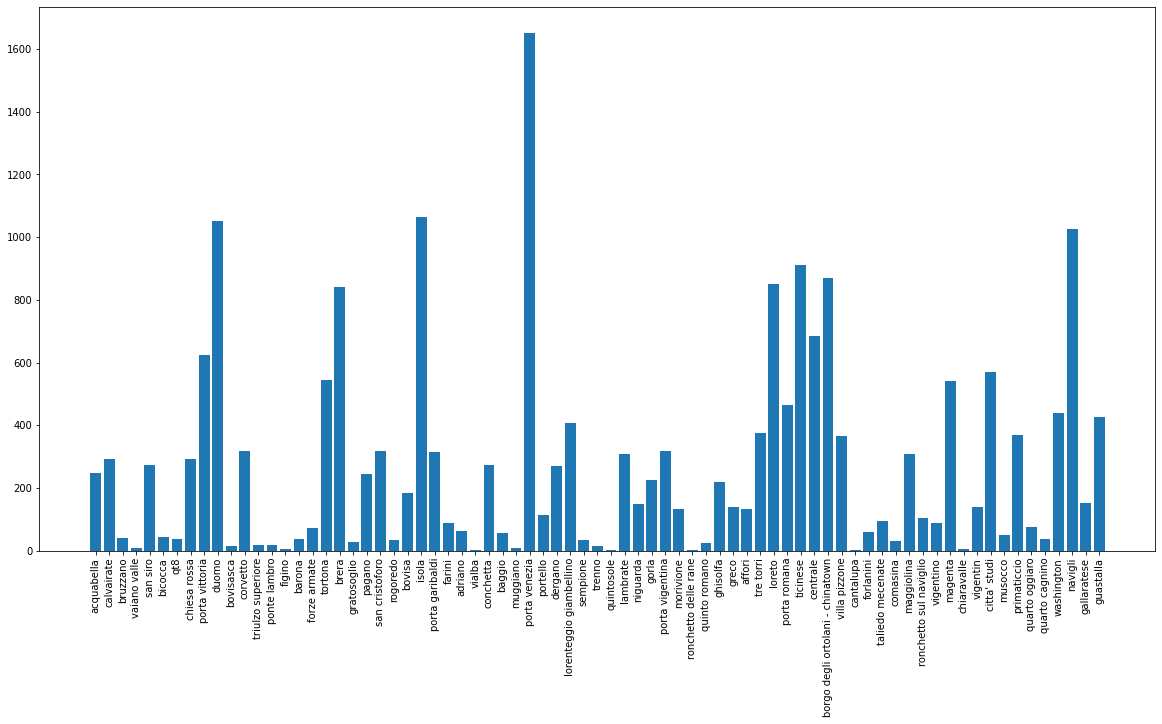

In [48]:
# Plot an histogram of the number of listings related to a neighborhood

list_data_real_neighbourhood_count = []

for data_real_neighbourhood in set(list_data_real_neighbourhood): 
    list_data_real_neighbourhood_count.append((str(data_real_neighbourhood), list_data_real_neighbourhood.count(str(data_real_neighbourhood))))

#print(list_data_real_neighbourhood_count)

data_real_neighbourhoods = [data_real_neighbourhood_count[0] for data_real_neighbourhood_count in list_data_real_neighbourhood_count]
counts = [data_real_neighbourhood_count[1] for data_real_neighbourhood_count in list_data_real_neighbourhood_count]

#print(counts)

plt.figure(figsize = (20, 10)) 
plt.bar(data_real_neighbourhoods, counts)
plt.xticks(rotation=90)
plt.show()

In [49]:
total_number_listing = df_listings_data_cleaned.shape[0]

#print(total_number_listing)

for neighbourhood, count in list_data_real_neighbourhood_count:
    print('{0:<35} {1:>8}'.format(neighbourhood, count / total_number_listing))

acquabella                          0.012072141956753612
calvairate                          0.014205371860758266
bruzzano                            0.0019392999127315039
vaiano valle                        0.0004363424803645884
san siro                            0.013235721904392515
bicocca                             0.0020847474061863667
qt8                                 0.001793852419276641
chiesa rossa                        0.014108406865121692
porta vittoria                      0.030204596140793172
duomo                               0.05095510520702026
bovisasca                           0.000727237467274314
corvetto                            0.01536895180839717
triulzo superiore                   0.0008242024629108892
ponte lambro                        0.0008242024629108892
figino                              0.0001939299912731504
barona                              0.001793852419276641
forze armate                        0.003490739842916707
tortona                    

Now let's detect the language of **neighborhood_overview**:

In [50]:
# TextBlob after somem request gives: HTTP Error 429: Too Many Requests

#text_blob = TextBlob('la casa è brutta')

#print(text_blob.detect_language())

In [51]:
#def detect_language(text):
#    try:
#        return TextBlob(text).detect_language()
#    except:
#        return 'not detected'
#    
#print(detect_language(22))

Searching online I have found this very intresting [blog post](http://blog.alejandronolla.com/2013/05/15/detecting-text-language-with-python-and-nltk/) about language detection through counting the stop words

In [52]:
# Adapted from http://blog.alejandronolla.com/2013/05/15/detecting-text-language-with-python-and-nltk/

def calculate_languages_ratios(text):
    """
    Calculate probability of given text to be written in several languages and
    return a dictionary that looks like {'french': 2, 'spanish': 4, 'english': 0}
    
    @param word_tokens: Tokenized text whose language want to be detected
    @type text: str
    
    @return: Dictionary with languages and unique stopwords seen in analyzed text
    @rtype: dict
    """

    languages_ratios = {}
    
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text)
    words = [word.lower() for word in word_tokens]

    # Compute per language included in nltk number of unique stopwords appearing in analyzed text
    for language in stopwords.fileids():
        stopwords_set = set(stopwords.words(language))
        words_set = set(words)
        common_elements = words_set.intersection(stopwords_set)
        languages_ratios[language] = len(common_elements) # language "score"

    return languages_ratios


def detect_language(text):
    """
    Calculate probability of given text to be written in several languages and
    return the highest scored.
    
    It uses a stopwords based approach, counting how many unique stopwords
    are seen in analyzed text.
    
    @param text: Text whose language want to be detected
    @type text: str
    
    @return: Most scored language guessed
    @rtype: str
    """
    
    try:
        ratios = calculate_languages_ratios(text)
        most_rated_language = max(ratios, key = ratios.get)
    except:
        most_rated_language = 'not detected'
        
    return most_rated_language


#input_text = "This is a sample sentence, showing off the language detection"
input_text = "Questa è una frase in italiano"

print(detect_language(input_text))

italian


In [53]:
# Mark each neighborhood_overview with the detected language

start_time = time.time()

df_listings_data_cleaned['detected_language'] = [detect_language(neighborhood_overview) for neighborhood_overview in df_listings_data_cleaned['neighborhood_overview']]
 
end_time = time.time()
elapsed_time = end_time - start_time

print('Elapsed time: {} seconds'.format(elapsed_time))

Elapsed time: 150.70872735977173 seconds


In [54]:
df_listings_data_cleaned.head(20)

,id,neighborhood_overview,real_neighbourhood,detected_language
0,6400,The neighborhood is quiet and very well connec...,conchetta,english
1,23986,NaN,navigli,not detected
2,28300,la zona è piena di piccoli ristorantini e loca...,borgo degli ortolani - chinatown,italian
3,32119,NaN,gorla,not detected
4,32649,"Flat It's located in north side of milan, jus...",gorla,english
5,37256,"Best area of Milan, at walking distance from t...",guastalla,english
6,40470,NaN,gorla,not detected
7,42732,"Navigli is the most lively area of Milan, with...",ticinese,english
8,46536,"Flat It's located in north side of milan, jus...",gorla,english
9,52181,NaN,baggio,not detected


In [55]:
list_detected_language = list(df_listings_data_cleaned['detected_language'])  

In [56]:
print(len(list_detected_language))

20626


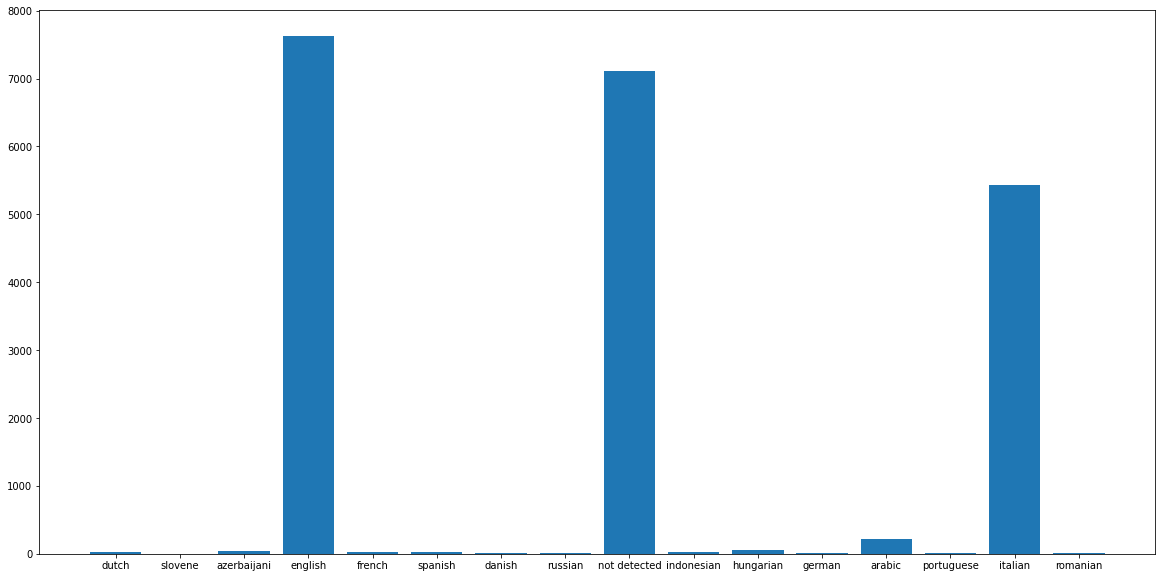

In [57]:
# Plot an histogram of the neighborhood_overview detected languages

list_language_count = []

for language in set(list_detected_language): 
    list_language_count.append((language, list_detected_language.count(language)))

#print(list_language_count)

languages = [language_count[0] for language_count in list_language_count]
counts = [language_count[1] for language_count in list_language_count]

plt.figure(figsize = (20, 10)) 
plt.bar(languages, counts)
plt.show()

In [58]:
total_number_review = df_listings_data_cleaned.shape[0]

#print(total_number_review)

for language, count in list_language_count:
    print('{0:<15} {1:>8}'.format(language, count / total_number_review))

dutch           0.0010181324541840395
slovene         4.84824978182876e-05
azerbaijani     0.0020847474061863667
english         0.36972752836226125
french          0.0013575099389120527
spanish         0.0012605449432754776
danish          0.0008726849607291768
russian         0.00024241248909143799
not detected    0.3447590419858431
indonesian      0.0011635799476389023
hungarian       0.0025210898865509553
german          0.0002908949869097256
arabic          0.010423737030931834
portuguese      0.0005333074760011636
italian         0.26325996315330163
romanian        0.0004363424803645884


The same analysis must be done on the reviews:

In [59]:
df_reviews_data_cleaned = df_reviews_data[['listing_id'
                                           #, 'date'
                                           , 'comments']]

df_reviews_data_cleaned.head()

,listing_id,comments
0,6400,I had such a great stay at 'the studio.' Fran...
1,6400,Staying at Francesca's and Alberto's place was...
2,6400,This is my second time staying with Francesca ...
3,6400,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
4,6400,"I was lucky so I have stayed with Francesca, A..."


<AxesSubplot:>

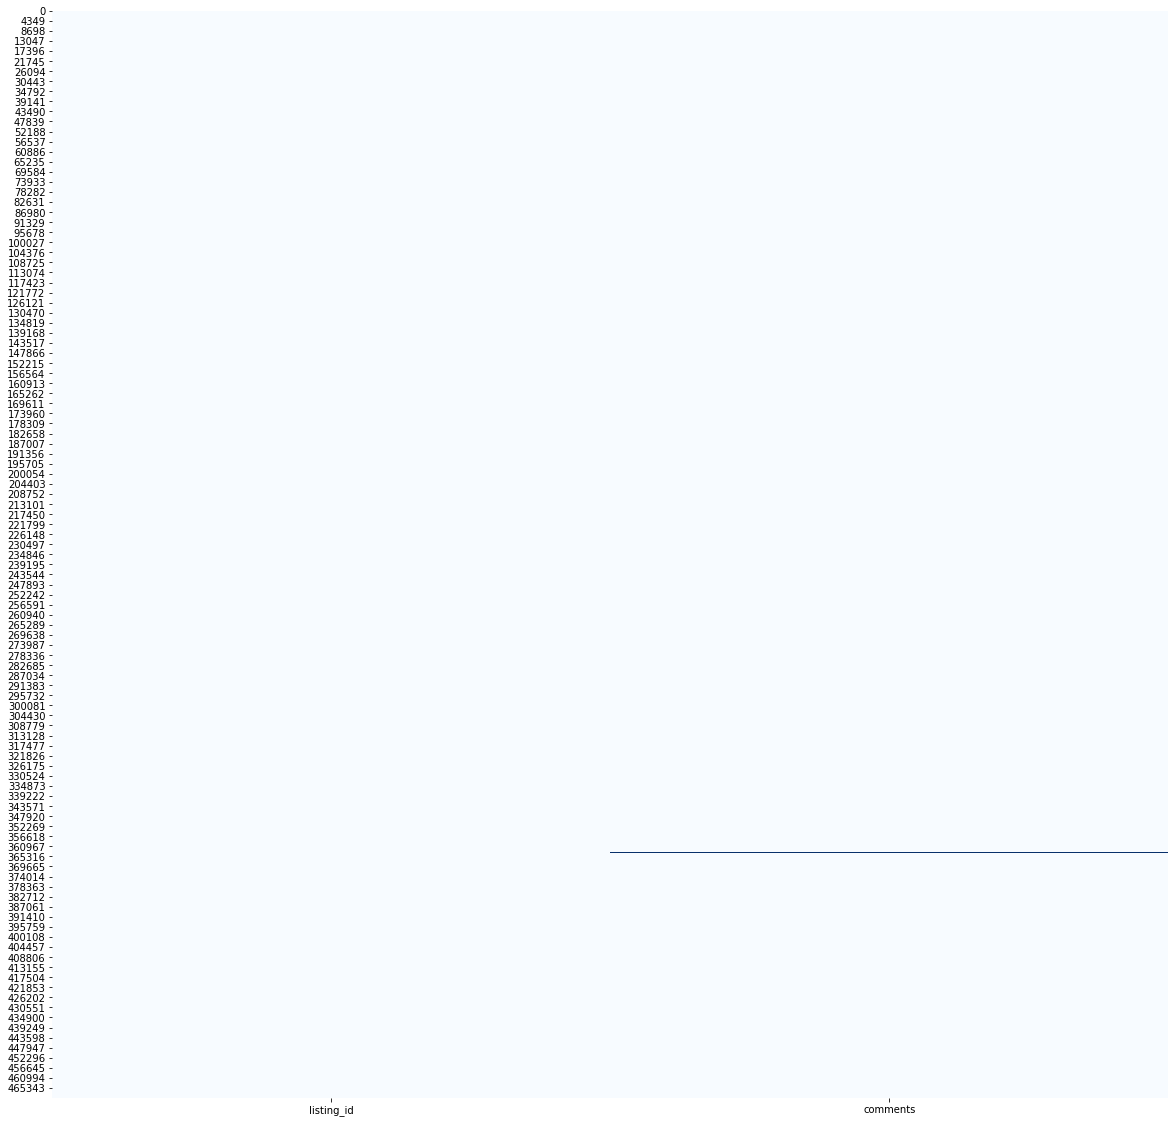

In [60]:
# Heatmap of the missing values

# Not very usefull because there is no missing value

plt.figure(figsize = (20, 20))
sns.heatmap(df_reviews_data_cleaned.isnull(), cmap = 'Blues', cbar = False)

In [61]:
# Join df_reviews_data_cleaned with listings dataframe to link listing_id to the neighborhood

df_listings_reviews = df_reviews_data_cleaned.join(df_listings_data_cleaned[['id', 'real_neighbourhood']].set_index('id'), on='listing_id')

df_listings_reviews.head(20)

,listing_id,comments,real_neighbourhood
0,6400,I had such a great stay at 'the studio.' Fran...,conchetta
1,6400,Staying at Francesca's and Alberto's place was...,conchetta
2,6400,This is my second time staying with Francesca ...,conchetta
3,6400,"Ein wunderbares Zimmer mit privatem Bad/ WC, a...",conchetta
4,6400,"I was lucky so I have stayed with Francesca, A...",conchetta
5,6400,Always a pleasure staying with Francesca and f...,conchetta
6,6400,The host canceled this reservation the day bef...,conchetta
7,6400,Another nice stay at Francesca's place.. I fee...,conchetta
8,6400,I've been staying at Francesca and Alberto's p...,conchetta
9,6400,The host canceled this reservation 4 days befo...,conchetta


In [62]:
list_review_data_real_neighbourhood = list(df_listings_reviews['real_neighbourhood']) 

In [63]:
#print(len(list_review_data_real_neighbourhood))

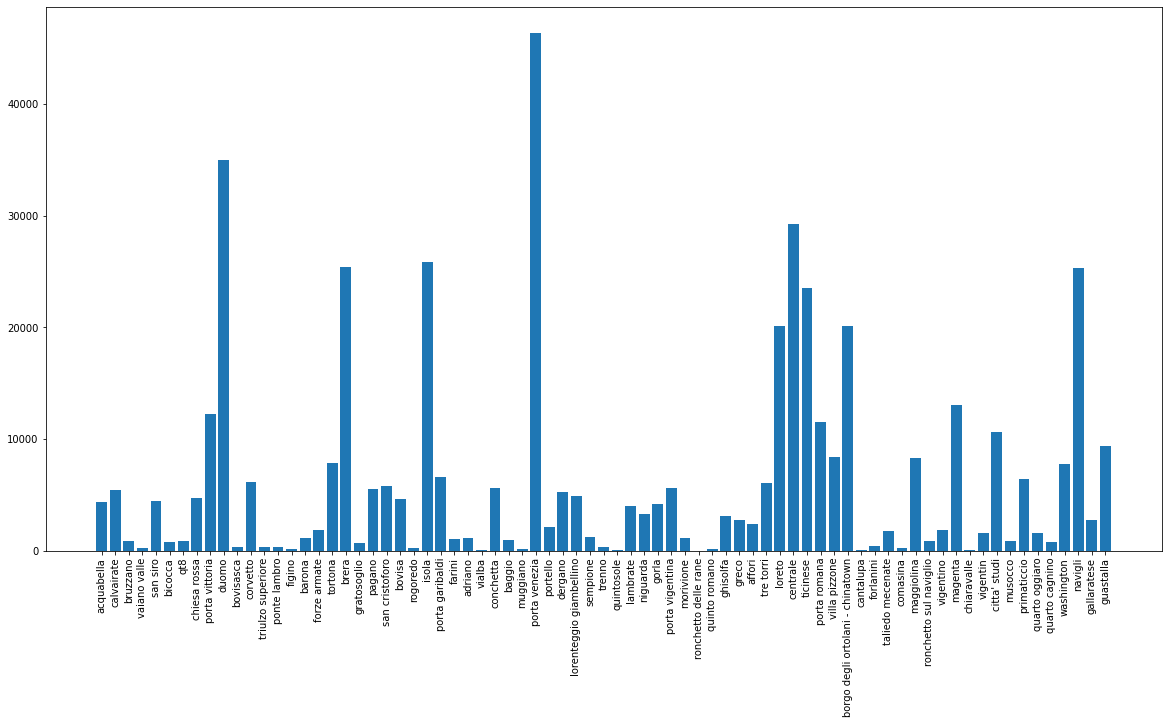

In [64]:
# Plot an histogram of the number of review related to a neighborhood

list_review_data_real_neighbourhood_count = []

for data_review_real_neighbourhood in set(list_review_data_real_neighbourhood): 
    list_review_data_real_neighbourhood_count.append((str(data_review_real_neighbourhood), list_review_data_real_neighbourhood.count(str(data_review_real_neighbourhood))))

#print(list_review_data_real_neighbourhood_count)

review_data_real_neighbourhoods = [review_data_real_neighbourhood_count[0] for review_data_real_neighbourhood_count in list_review_data_real_neighbourhood_count]
counts = [review_data_real_neighbourhood_count[1] for review_data_real_neighbourhood_count in list_review_data_real_neighbourhood_count]

#print(sum(counts))

plt.figure(figsize = (20, 10)) 
plt.bar(review_data_real_neighbourhoods, counts)
plt.xticks(rotation=90)
plt.show()

In [65]:
total_number_listing = df_listings_data_cleaned.shape[0]

#print(total_number_listing)

for neighbourhood, count in list_review_data_real_neighbourhood_count:
    print('{0:<35} {1:>8}'.format(neighbourhood, count / total_number_listing))

acquabella                          0.20920197808591098
calvairate                          0.2647629205856686
bruzzano                            0.040095025695723846
vaiano valle                        0.011005527004751285
san siro                            0.21744400271501987
bicocca                             0.03825269077862892
qt8                                 0.04276156307572966
chiesa rossa                        0.2299040046543198
porta vittoria                      0.5941530107631146
duomo                               1.694851158731698
bovisasca                           0.01333268690002909
corvetto                            0.29967031901483565
triulzo superiore                   0.015223504314942305
ponte lambro                        0.015514399301852031
figino                              0.005284592262193348
barona                              0.053718607582662656
forze armate                        0.09124406089401726
tortona                             0.381945117

In [66]:
# Mark each review with the detected language

start_time = time.time()

df_reviews_data_cleaned['detected_language'] = [detect_language(comment) for comment in df_reviews_data_cleaned['comments']]

end_time = time.time()
elapsed_time = end_time - start_time

print('Elapsed time: {} seconds'.format(elapsed_time))

Elapsed time: 4874.368116617203 seconds


<ipython-input-66-b73d61623454>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_data_cleaned['detected_language'] = [detect_language(comment) for comment in df_reviews_data_cleaned['comments']]


In [67]:
df_reviews_data_cleaned.head(20)

,listing_id,comments,detected_language
0,6400,I had such a great stay at 'the studio.' Fran...,english
1,6400,Staying at Francesca's and Alberto's place was...,english
2,6400,This is my second time staying with Francesca ...,english
3,6400,"Ein wunderbares Zimmer mit privatem Bad/ WC, a...",german
4,6400,"I was lucky so I have stayed with Francesca, A...",english
5,6400,Always a pleasure staying with Francesca and f...,english
6,6400,The host canceled this reservation the day bef...,english
7,6400,Another nice stay at Francesca's place.. I fee...,english
8,6400,I've been staying at Francesca and Alberto's p...,english
9,6400,The host canceled this reservation 4 days befo...,english


In [68]:
list_detected_language = list(df_reviews_data_cleaned['detected_language'])  

In [69]:
print(len(list_detected_language))

469653


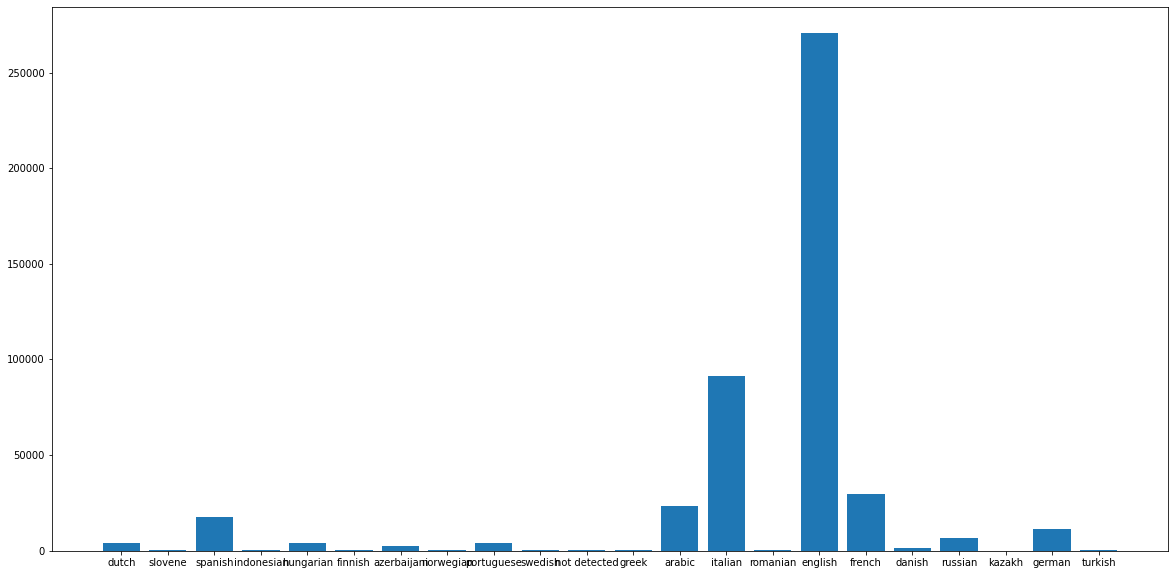

In [70]:
# Plot an histogram of the comments detected languages

list_language_count = []

for language in set(list_detected_language): 
    list_language_count.append((language, list_detected_language.count(language)))

#print(list_language_count)

languages = [language_count[0] for language_count in list_language_count]
counts = [language_count[1] for language_count in list_language_count]

plt.figure(figsize = (20, 10)) 
plt.bar(languages, counts)
plt.show()

In [71]:
total_number_review = df_reviews_data_cleaned.shape[0]

#print(total_number_review)

for language, count in list_language_count:
    print('{0:<15} {1:>8}'.format(language, count / total_number_review))

dutch           0.00875114180043564
slovene         0.001420197464936879
spanish         0.03770017438406653
indonesian      0.0005983140744336776
hungarian       0.008310390863041438
finnish         0.0006259940849946663
azerbaijani     0.0056083959859726225
norwegian       0.0005301786638220133
portuguese      0.008333812410439196
swedish         0.0007388433588202353
not detected    0.00041094169525160066
greek           0.0007878156851973691
arabic          0.049645163556923944
italian         0.1949481851494614
romanian        0.0005365663585668568
english         0.5762169090796823
french          0.06334676878461332
danish          0.003061835014361667
russian         0.013718639080342295
kazakh          2.129231581614511e-06
german          0.024305178504129644
turkish         0.0004024247689251426


In [72]:
# Save dataframe

df_listings_data_cleaned.to_csv(data_folder + 'output_' + 'listings.csv')
df_reviews_data_cleaned.to_csv(data_folder + 'output_' + 'reviews.csv')

#df_listings_data_cleaned = pd.read_csv(data_folder + 'output_' + 'listings.csv')
#df_reviews_data_cleaned = pd.read_csv(data_folder + 'output_' + 'reviews.csv')

As first step for sake of simplicity let's focus on neighborhood overview and reviews in English.
Anyway some possible strategies to tackle the different languages could be:
- Translate everything to English
- Try to redo the same steps for other languages (first of Italian because is the second one more used)

The words that gives us context are the one related to neighborhood:

Synonyms neighborhood (Quartiere in Italian):
- [`English`](https://www.thesaurus.com/browse/neighborhood):
 - area
 - block
 - district
 - ghetto
 - parish
 - part
 - precinct
 - region
 - section
 - slum
 - street
 - suburb
 - territory
 - zone
- [`Italian`](https://dizionari.corriere.it/dizionario_sinonimi_contrari/Q/quartiere.shtml):
 - zona
 - vicinato
 - rione
 - sobborgo
 - borgata
 
 As already said let's focus on English and extract only the records marked like so:

In [73]:
df_listings_data_cleaned_eng = df_listings_data_cleaned[df_listings_data_cleaned['detected_language'] == 'english']

#df_listings_data_cleaned_eng.set_index('id', inplace = True)

df_listings_data_cleaned_eng.head()

,id,neighborhood_overview,real_neighbourhood,detected_language
0,6400,The neighborhood is quiet and very well connec...,conchetta,english
4,32649,"Flat It's located in north side of milan, jus...",gorla,english
5,37256,"Best area of Milan, at walking distance from t...",guastalla,english
7,42732,"Navigli is the most lively area of Milan, with...",ticinese,english
8,46536,"Flat It's located in north side of milan, jus...",gorla,english


In [74]:
print(df_listings_data_cleaned_eng.shape[0])

7626


In [75]:
df_reviews_data_cleaned_eng = df_reviews_data_cleaned[df_reviews_data_cleaned['detected_language'] == 'english']

df_reviews_data_cleaned_eng.head()

,listing_id,comments,detected_language
0,6400,I had such a great stay at 'the studio.' Fran...,english
1,6400,Staying at Francesca's and Alberto's place was...,english
2,6400,This is my second time staying with Francesca ...,english
4,6400,"I was lucky so I have stayed with Francesca, A...",english
5,6400,Always a pleasure staying with Francesca and f...,english


In [76]:
print(df_reviews_data_cleaned_eng.shape[0])

270622


In listing using **neighborhood_overview** we can directly get the sentiment of the neighborhood but for the reviews for the **comments** we have to extract the sentences only related to neighborhood.

In [77]:
text_blob = TextBlob('in my opinion textblob is very usefull')

#print(text_blob.detect_language()) # after some requests gives HTTP Error 429: Too Many Requests
print(text_blob.tags)
print(text_blob.words)
print(text_blob.sentiment.polarity)

[('in', 'IN'), ('my', 'PRP$'), ('opinion', 'NN'), ('textblob', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('usefull', 'JJ')]
['in', 'my', 'opinion', 'textblob', 'is', 'very', 'usefull']
0.2


In [78]:
def get_polarity_sentiment(text):
    return TextBlob(text).sentiment.polarity

print(get_polarity_sentiment('pippo is awesome'))

1.0


In [79]:
# Mark each review with the neighborhood sentiment

start_time = time.time()

df_listings_data_cleaned_eng['neighborhood_sentiment'] = [get_polarity_sentiment(row['neighborhood_overview']) for index, row in df_listings_data_cleaned_eng.iterrows()]

end_time = time.time()
elapsed_time = end_time - start_time

print('Elapsed time: {} seconds'.format(elapsed_time))

Elapsed time: 8.497936964035034 seconds


<ipython-input-79-71814c85cb0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_data_cleaned_eng['neighborhood_sentiment'] = [get_polarity_sentiment(row['neighborhood_overview']) for index, row in df_listings_data_cleaned_eng.iterrows()]


In [80]:
df_listings_data_cleaned_eng.head(20)

,id,neighborhood_overview,real_neighbourhood,detected_language,neighborhood_sentiment
0,6400,The neighborhood is quiet and very well connec...,conchetta,english,0.208791
4,32649,"Flat It's located in north side of milan, jus...",gorla,english,0.268142
5,37256,"Best area of Milan, at walking distance from t...",guastalla,english,0.355556
7,42732,"Navigli is the most lively area of Milan, with...",ticinese,english,0.318182
8,46536,"Flat It's located in north side of milan, jus...",gorla,english,0.268142
11,55388,The neighbor is very convenient for those who ...,lorenteggio giambellino,english,0.400000
12,62215,Central Station is a great choice for traveler...,centrale,english,0.350000
14,69749,"It's calm and pretty, very close to downtown, ...",porta vittoria,english,0.454167
17,74835,The neighborhood is really great: you are in f...,duomo,english,0.190476
19,79696,"Here everything is ""foot friendly"": restaurant...",ticinese,english,0.500000


In [81]:
df_listings_neighbourhood_sentiment = df_listings_data_cleaned_eng[['real_neighbourhood', 'neighborhood_sentiment']]

df_listings_neighbourhood_sentiment = df_listings_neighbourhood_sentiment.groupby(['real_neighbourhood'], as_index = False)['neighborhood_sentiment'].mean()

df_listings_neighbourhood_sentiment = df_listings_neighbourhood_sentiment.sort_values(by = 'neighborhood_sentiment', ascending = False)

df_listings_neighbourhood_sentiment

,real_neighbourhood,neighborhood_sentiment
60,sempione,0.270876
54,quinto romano,0.270806
35,magenta,0.270733
52,quarto cagnino,0.268333
9,brera,0.264244
...,...,...
12,cantalupa,0.102362
16,comasina,0.088535
25,gallaratese,0.082105
55,quintosole,0.079444


In [82]:
# Let's peek at the neighborhood_overview of the best and the worst scoring neighborhood

list_neighborhood_overview = list(df_listings_data_cleaned_eng[df_listings_data_cleaned_eng['real_neighbourhood'] == 'sempione']['neighborhood_overview'])
string_list_neighborhood_overview = ' '.join(list_neighborhood_overview)
#print(string_list_neighborhood_overview)

tokenizer = RegexpTokenizer(r'\w+')
word_tokens = tokenizer.tokenize(string_list_neighborhood_overview)
words = [word.lower() for word in word_tokens]
stop_words = set(stopwords.words('english')) 

#print(stop_words)

filtered_list_neighborhood_overview = [w for w in words if not w in stop_words] 
filtered_string_list_neighborhood_overview = ' '.join(filtered_list_neighborhood_overview)
#print(filtered_string_list_neighborhood_overview) 

text_blob = TextBlob(filtered_string_list_neighborhood_overview)
df_neighborhood_overview_word_count = pd.DataFrame((text_blob.word_counts).items(), columns=['word', 'count'])
df_neighborhood_overview_word_count = df_neighborhood_overview_word_count.sort_values(by='count', ascending=False)
df_neighborhood_overview_word_count.head(20)

,word,count
36,sempione,15
3,area,13
54,park,11
171,corso,11
131,brera,11
6,restaurants,10
48,milan,9
35,parco,8
112,minutes,8
172,como,7


In [83]:
list_neighborhood_overview = list(df_listings_data_cleaned_eng[df_listings_data_cleaned_eng['real_neighbourhood'] == 'figino']['neighborhood_overview'])
string_list_neighborhood_overview = ' '.join(list_neighborhood_overview)
#print(string_list_neighborhood_overview)

tokenizer = RegexpTokenizer(r'\w+')
word_tokens = tokenizer.tokenize(string_list_neighborhood_overview)
words = [word.lower() for word in word_tokens]
stop_words = set(stopwords.words('english')) 

#print(stop_words)

filtered_list_neighborhood_overview = [w for w in words if not w in stop_words] 
filtered_string_list_neighborhood_overview = ' '.join(filtered_list_neighborhood_overview)
#print(filtered_string_list_neighborhood_overview) 

text_blob = TextBlob(filtered_string_list_neighborhood_overview)
df_neighborhood_overview_word_count = pd.DataFrame((text_blob.word_counts).items(), columns=['word', 'count'])
df_neighborhood_overview_word_count = df_neighborhood_overview_word_count.sort_values(by='count', ascending=False)
df_neighborhood_overview_word_count.head(20)

,word,count
0,greenest,1
1,neighborhood,1
2,milan,1
3,three,1
4,big,1
5,parks,1
6,around,1
7,makes,1
8,feel,1
9,coutryside,1


Intresting to note that the sentiment is of course highly affected by how many words are present in the concatenation of all **neighborhood_overview**. For example for the worst 'figino' there is only one **neighborhood_overview** so the sentiment is really low compared to the others even if the actual **neighborhood_overview** is pretty good.

In [84]:
df_listings_neighbourhood_sentiment.describe()

,neighborhood_sentiment
count,72.000000
mean,0.184711
std,0.051920
min,0.055556
25%,0.144111
50%,0.189029
75%,0.226862
max,0.270876


array([[<AxesSubplot:title={'center':'neighborhood_sentiment'}>]],
      dtype=object)

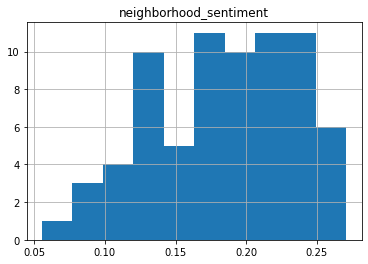

In [85]:
# Plot the distribution of the sentiment of the neighbourhoods

df_listings_neighbourhood_sentiment.hist(column='neighborhood_sentiment')

The distribution of the neighborhoods sentiment is skewed right because of course the hosts will in general give a more positive overview of the neighborhood.

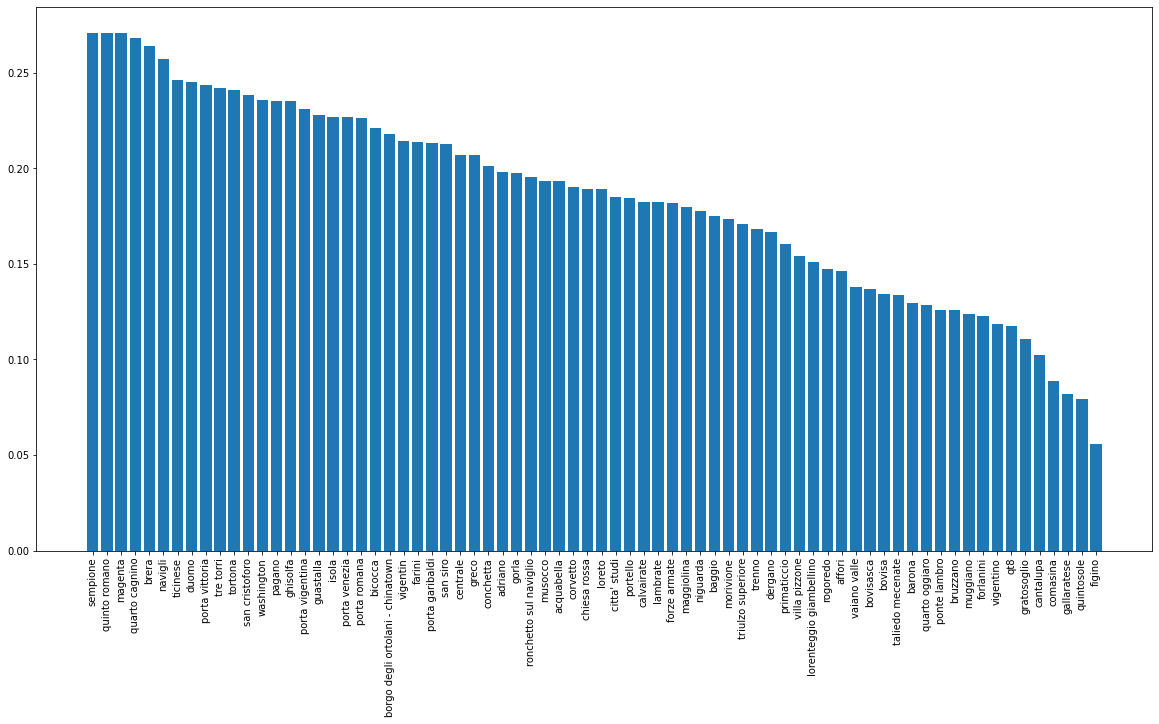

In [86]:
# Plot an histogram of the detected sentiment of the neighborhoods

neighborhoods = []
sentiments = []

for index, row in df_listings_neighbourhood_sentiment.iterrows():
    neighborhoods.append(row['real_neighbourhood'])
    sentiments.append(row['neighborhood_sentiment']) 
    
plt.figure(figsize = (20, 10)) 
plt.bar(neighborhoods, sentiments)
plt.xticks(rotation = 90)
plt.show()    

Now let's search in the review for the keywords related to neighborhood:

In [87]:
searched_words_english = [ 'neighborhood'
                          , 'area'
                          , 'block'
                          , 'district'
                          , 'ghetto'
                          , 'parish'
                          #, 'part' # removed beacuse was beeing used to mark not neighborhood related part of comments
                          , 'precinct'
                          , 'region'
                          , 'section'
                          , 'slum'
                          , 'street'
                          , 'suburb'
                          , 'territory'
                          , 'zone'
                          , 'location'
                          ]

#searched_words_italian = ['quartiere'
#                          , 'zona'
#                          , 'vicinato'
#                          , 'rione'
#                          , 'sobborgo'
#                          , 'borgata'
#                          ]

#sarched_words  = searched_words_english + searched_words_italian

In [88]:
def detect_words(text, searched_words):
    try:
        for word in searched_words:
            if word in text:
                return True
    except:
        return False
    return False

print(detect_words('questo testo continene pippo', ['pippo', 'pluto']))

True


In [89]:
def clean_tokenize_text(text, language):
    try:
        tokenizer = RegexpTokenizer(r'\w+')
        word_tokens = tokenizer.tokenize(text)
        stop_words = set(stopwords.words(language)) 
        filtered_sentence = [word for word in word_tokens if not word in stop_words] 
        return filtered_sentence
    except:
        return False
    
input_text = "This is a sample sentence, showing off the stop words filtration!!!"
print(clean_tokenize_text(input_text, 'english'))

['This', 'sample', 'sentence', 'showing', 'stop', 'words', 'filtration']


Let's check the first comment:

In [90]:
# Tokenize and clean comments
comment, language = df_reviews_data_cleaned_eng[['comments','detected_language']].iloc[0]

print(comment, language)

I had such a great stay at 'the studio.'  Francesca and Alberto are terrific hosts...not only did they provide maps with great suggestions of places and things to see, their warmth and friendly nature really made me feel at home in their place.  Their home is right off one of the above ground trams that leads to the duome in like 12 minutes!  I would highly recommend this place! english


In [91]:
print(clean_tokenize_text(comment, language))

['I', 'great', 'stay', 'studio', 'Francesca', 'Alberto', 'terrific', 'hosts', 'provide', 'maps', 'great', 'suggestions', 'places', 'things', 'see', 'warmth', 'friendly', 'nature', 'really', 'made', 'feel', 'home', 'place', 'Their', 'home', 'right', 'one', 'ground', 'trams', 'leads', 'duome', 'like', '12', 'minutes', 'I', 'would', 'highly', 'recommend', 'place']


In [92]:
print(detect_words(clean_tokenize_text(comment, language), searched_words_english))

False


In [93]:
# Mark each review if searched words are present

start_time = time.time()

df_reviews_data_cleaned_eng['contains_searched_words'] = [detect_words(clean_tokenize_text(row['comments'], row['detected_language']), searched_words_english) for index, row in df_reviews_data_cleaned_eng.iterrows()]

end_time = time.time()
elapsed_time = end_time - start_time

print('Elapsed time: {} seconds'.format(elapsed_time))

Elapsed time: 200.61309909820557 seconds


<ipython-input-93-bd3988d6fe10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_data_cleaned_eng['contains_searched_words'] = [detect_words(clean_tokenize_text(row['comments'], row['detected_language']), searched_words_english) for index, row in df_reviews_data_cleaned_eng.iterrows()]


In [94]:
df_reviews_data_cleaned_eng.head()

,listing_id,comments,detected_language,contains_searched_words
0,6400,I had such a great stay at 'the studio.' Fran...,english,False
1,6400,Staying at Francesca's and Alberto's place was...,english,True
2,6400,This is my second time staying with Francesca ...,english,False
4,6400,"I was lucky so I have stayed with Francesca, A...",english,True
5,6400,Always a pleasure staying with Francesca and f...,english,False


In [95]:
list_contains_serached_words = list(df_reviews_data_cleaned_eng['contains_searched_words'])  

In [96]:
print(len(list_contains_serached_words))

270622


In [97]:
print(sum(list_contains_serached_words))

111855


In [98]:
print(sum(list_contains_serached_words) / df_reviews_data_cleaned_eng.shape[0])

0.413325598066676


Only 41% of the english review contains some words related to the neighborhood.

We will consider only records containing the searched words:

In [99]:
df_reviews_data_cleaned_eng_contains = df_reviews_data_cleaned_eng[df_reviews_data_cleaned_eng['contains_searched_words'] == True]

df_reviews_data_cleaned_eng_contains.head()

,listing_id,comments,detected_language,contains_searched_words
1,6400,Staying at Francesca's and Alberto's place was...,english,True
4,6400,"I was lucky so I have stayed with Francesca, A...",english,True
11,23986,We came to Milan for the Salone and had a fant...,english,True
13,23986,"Great apartment, clean and well equipped, grea...",english,True
18,23986,The apartment was nice and well furnished. Ove...,english,True


Now the goal is to isolate the words related to neighborhood or similar:

In [100]:
comment = df_reviews_data_cleaned_eng_contains['comments'].iloc[0]

print(comment)

Staying at Francesca's and Alberto's place was a pleasure. Just as described, well located for my purposes, an enjoyable walk to the Tortona area. The room is very nice, cleaned daily and has private bathroom.

Francesca is super friendly and very helpful; whilst still respecting privacy.

Overall a great experience!



By looking at some comments I had realize I cuold use punctuation to isolate the phares related to neighborhood instad of remove it like I ws rhinking at the beginning.

In [101]:
def get_contextual_phrase(text, language, searched_words):
    contextual_phrase = ''
    sentences = text.split('.')
    for sentence in sentences:
        if detect_words(clean_tokenize_text(sentence, language), searched_words) == True:
            contextual_phrase = contextual_phrase + ' ' + sentence
    if contextual_phrase == '':
        return text
    else:
        return contextual_phrase

text = "Staying at Francesca's and Alberto's place was a pleasure. Just as described, well located for my purposes, an enjoyable walk to the Tortona area. The room is very nice, cleaned daily and has private bathroom.Francesca is super friendly and very helpful; whilst still respecting privacy. Overall a great experience!"

print(get_contextual_phrase(text, 'english', searched_words_english))

  Just as described, well located for my purposes, an enjoyable walk to the Tortona area


In [102]:
# Mark each review with contextual phrases

start_time = time.time()

df_reviews_data_cleaned_eng_contains['contextual_phrases'] = [get_contextual_phrase(row['comments'], row['detected_language'], searched_words_english) for index, row in df_reviews_data_cleaned_eng_contains.iterrows()]

end_time = time.time()
elapsed_time = end_time - start_time

print('Elapsed time: {} seconds'.format(elapsed_time))

Elapsed time: 299.0844957828522 seconds


<ipython-input-102-e0a1e2651d9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_data_cleaned_eng_contains['contextual_phrases'] = [get_contextual_phrase(row['comments'], row['detected_language'], searched_words_english) for index, row in df_reviews_data_cleaned_eng_contains.iterrows()]


In [103]:
df_reviews_data_cleaned_eng_contains.head()

,listing_id,comments,detected_language,contains_searched_words,contextual_phrases
1,6400,Staying at Francesca's and Alberto's place was...,english,True,"Just as described, well located for my purpo..."
4,6400,"I was lucky so I have stayed with Francesca, A...",english,True,Out of home area is safty at (Website hidden ...
11,23986,We came to Milan for the Salone and had a fant...,english,True,We came to Milan for the Salone and had a fan...
13,23986,"Great apartment, clean and well equipped, grea...",english,True,"Great apartment, clean and well equipped, gre..."
18,23986,The apartment was nice and well furnished. Ove...,english,True,We didn't feel super safe in the neighborhoo...


Now we can evaluate the sentiment of the neighborhood retated sentences:

In [104]:
comment = df_reviews_data_cleaned_eng_contains['contextual_phrases'].iloc[0]

print(comment)

text_blob = TextBlob(comment)

print(text_blob.tags)
print(text_blob.words)
print(text_blob.sentiment.polarity)

  Just as described, well located for my purposes, an enjoyable walk to the Tortona area
[('Just', 'RB'), ('as', 'IN'), ('described', 'VBN'), ('well', 'RB'), ('located', 'VBN'), ('for', 'IN'), ('my', 'PRP$'), ('purposes', 'NNS'), ('an', 'DT'), ('enjoyable', 'JJ'), ('walk', 'NN'), ('to', 'TO'), ('the', 'DT'), ('Tortona', 'NNP'), ('area', 'NN')]
['Just', 'as', 'described', 'well', 'located', 'for', 'my', 'purposes', 'an', 'enjoyable', 'walk', 'to', 'the', 'Tortona', 'area']
0.5


In [105]:
# Mark each review with the neighborhood sentiment

start_time = time.time()

df_reviews_data_cleaned_eng_contains['neighborhood_sentiment'] = [get_polarity_sentiment(row['contextual_phrases']) for index, row in df_reviews_data_cleaned_eng_contains.iterrows()]

end_time = time.time()
elapsed_time = end_time - start_time

print('Elapsed time: {} seconds'.format(elapsed_time))

Elapsed time: 88.78878784179688 seconds


<ipython-input-105-4989fd7e21e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_data_cleaned_eng_contains['neighborhood_sentiment'] = [get_polarity_sentiment(row['contextual_phrases']) for index, row in df_reviews_data_cleaned_eng_contains.iterrows()]


In [106]:
df_reviews_data_cleaned_eng_contains.head(20)

,listing_id,comments,detected_language,contains_searched_words,contextual_phrases,neighborhood_sentiment
1,6400,Staying at Francesca's and Alberto's place was...,english,True,"Just as described, well located for my purpo...",0.500000
4,6400,"I was lucky so I have stayed with Francesca, A...",english,True,Out of home area is safty at (Website hidden ...,0.207500
11,23986,We came to Milan for the Salone and had a fant...,english,True,We came to Milan for the Salone and had a fan...,0.650000
13,23986,"Great apartment, clean and well equipped, grea...",english,True,"Great apartment, clean and well equipped, gre...",0.440606
18,23986,The apartment was nice and well furnished. Ove...,english,True,We didn't feel super safe in the neighborhoo...,0.177778
20,23986,Jeremy was very communicative and has a great ...,english,True,Jeremy was very communicative and has a great...,0.587500
21,23986,We stayed at Jeremy's place for about a month ...,english,True,The street is a little seedy but never unsaf...,0.253125
22,23986,Jeremy is amazing host! He has superior flat a...,english,True,Jeremy is amazing host! He has superior flat ...,0.518750
23,28300,Marta is a lovely host and the location of her...,english,True,Marta is a lovely host and the location of he...,0.187500
27,28300,"The flat was great!! Fantastic location, very ...",english,True,"The flat was great!! Fantastic location, very...",0.595000


In [107]:
df_reviews_listing_neighbourhood_sentiment = df_reviews_data_cleaned_eng_contains[['listing_id', 'neighborhood_sentiment']]

df_reviews_listing_neighbourhood_sentiment = df_reviews_listing_neighbourhood_sentiment.groupby(['listing_id'], as_index = False)['neighborhood_sentiment'].mean()

df_reviews_listing_neighbourhood_sentiment = df_reviews_listing_neighbourhood_sentiment.sort_values(by = 'neighborhood_sentiment', ascending = False)

df_reviews_listing_neighbourhood_sentiment

,listing_id,neighborhood_sentiment
4530,12127146,1.000000
3799,8699796,1.000000
4636,12359463,1.000000
404,938960,1.000000
9777,29829024,1.000000
...,...,...
7175,21314500,-0.366211
7152,21235741,-0.375000
6445,18712463,-0.500000
9115,26740328,-0.533333


In [108]:
df_reviews_listing_neighbourhood_sentiment.describe()

,listing_id,neighborhood_sentiment
count,1.040500e+04,10405.000000
mean,1.478613e+07,0.431855
std,9.505276e+06,0.179876
min,6.400000e+03,-0.666667
25%,5.799689e+06,0.337996
50%,1.533730e+07,0.438889
75%,2.302181e+07,0.524390
max,3.370410e+07,1.000000


In [109]:
# Join df_reviews_neighbourhood_sentiment with original dataframe to link sentiment to the neighborhood

df_listings_reviews_sentiment = df_listings_data_cleaned.join(df_reviews_listing_neighbourhood_sentiment.set_index('listing_id'), on='id')[['id', 'real_neighbourhood', 'neighborhood_sentiment']]

df_listings_reviews_sentiment.head()

,id,real_neighbourhood,neighborhood_sentiment
0,6400,conchetta,0.353750
1,23986,navigli,0.437960
2,28300,borgo degli ortolani - chinatown,0.346019
3,32119,gorla,0.192218
4,32649,gorla,0.212978


In [110]:
# Let's peek at some records

print(df_reviews_data_cleaned['comments'].iloc[6400])

Lucia is very helpful in helping to find just the right stuff to do for you in Milan. She has a little dog which we loved, but for those of you who are allergic you mght want to double-check. The location is very close to the center. It is quite noisy, but if you have earplugs, it  is all good.


In [111]:
df_reviews_neighbourhood_sentiment = df_listings_reviews_sentiment[['real_neighbourhood', 'neighborhood_sentiment']]

df_reviews_neighbourhood_sentiment = df_reviews_neighbourhood_sentiment.groupby(['real_neighbourhood'], as_index = False)['neighborhood_sentiment'].mean()

df_reviews_neighbourhood_sentiment = df_reviews_neighbourhood_sentiment.sort_values(by = 'neighborhood_sentiment', ascending = False)

df_reviews_neighbourhood_sentiment

,real_neighbourhood,neighborhood_sentiment
70,vialba,0.547808
62,sempione,0.518739
9,brera,0.512131
21,duomo,0.500693
64,ticinese,0.477555
...,...,...
8,bovisasca,0.259229
17,comasina,0.238602
55,quinto romano,0.201412
14,chiaravalle,0.200060


In [112]:
len(df_reviews_neighbourhood_sentiment['real_neighbourhood'].unique())

75

In [113]:
df_reviews_neighbourhood_sentiment.describe()

,neighborhood_sentiment
count,74.000000
mean,0.385380
std,0.069964
min,0.200060
25%,0.350799
50%,0.378173
75%,0.432806
max,0.547808


array([[<AxesSubplot:title={'center':'neighborhood_sentiment'}>]],
      dtype=object)

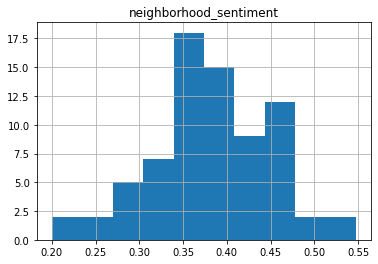

In [114]:
# Plot the distribution of the sentiment of the neighbourhoods

df_reviews_neighbourhood_sentiment.hist(column='neighborhood_sentiment')

The distribution of the neighborhoods sentiment is more gaussian distributed with respet to the one given by the **neighbourhood_overview**

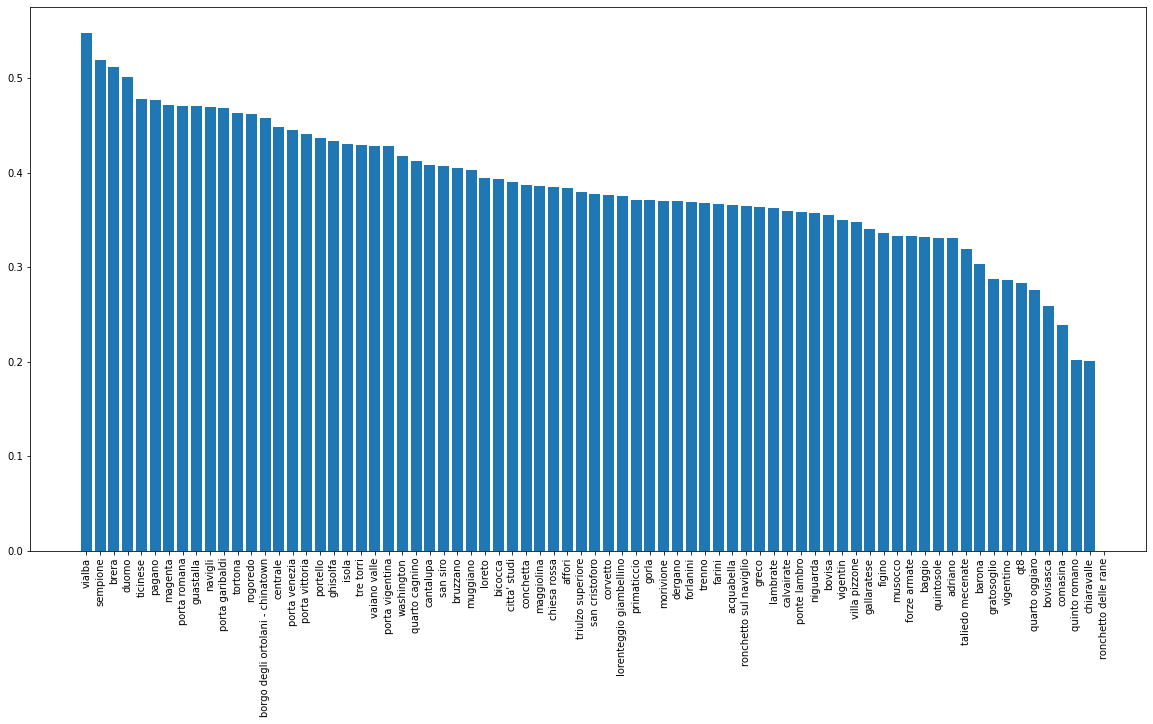

In [115]:
# Plot an histogram of the detected sentiment of the neighborhoods

neighborhoods = []
sentiments = []

for index, row in df_reviews_neighbourhood_sentiment.iterrows():
    neighborhoods.append(row['real_neighbourhood'])
    sentiments.append(row['neighborhood_sentiment'])
    
plt.figure(figsize = (20, 10)) 
plt.bar(neighborhoods, sentiments)
plt.xticks(rotation = 90)
plt.show()

Let's compare the results of a sentiment analysis on the **neighborhood_overview** column in the listing dataframe with the reviews one:

In [116]:
df_listings_neighbourhood_sentiment.head()

,real_neighbourhood,neighborhood_sentiment
60,sempione,0.270876
54,quinto romano,0.270806
35,magenta,0.270733
52,quarto cagnino,0.268333
9,brera,0.264244


In [117]:
df_reviews_neighbourhood_sentiment.head()

,real_neighbourhood,neighborhood_sentiment
70,vialba,0.547808
62,sempione,0.518739
9,brera,0.512131
21,duomo,0.500693
64,ticinese,0.477555


In [118]:
df_neighbourhood_sentiment = pd.DataFrame(list_real_neighbourhood, columns = ['real_neighbourhood'])

df_neighbourhood_sentiment.head()

,real_neighbourhood
0,ticinese
1,magenta
2,porta vercellina
3,cordusio
4,carrobbio


In [119]:
df_neighbourhood_sentiment = df_neighbourhood_sentiment.set_index('real_neighbourhood').join(df_listings_neighbourhood_sentiment.set_index('real_neighbourhood'), rsuffix='_listing')
df_neighbourhood_sentiment.rename(columns={'neighborhood_sentiment':'neighborhood_sentiment_listing'}, inplace = True)

In [120]:
df_neighbourhood_sentiment = df_neighbourhood_sentiment.join(df_reviews_neighbourhood_sentiment.set_index('real_neighbourhood'), rsuffix='_review')
df_neighbourhood_sentiment.rename(columns={'neighborhood_sentiment':'neighborhood_sentiment_review'}, inplace = True)

In [121]:
df_neighbourhood_sentiment.head()

,neighborhood_sentiment_listing,neighborhood_sentiment_review
real_neighbourhood,,
ticinese,0.246020,0.477555
magenta,0.270733,0.471442
porta vercellina,NaN,NaN
cordusio,NaN,NaN
carrobbio,NaN,NaN


In [122]:
df_neighbourhood_sentiment = df_neighbourhood_sentiment.sort_values(by = 'neighborhood_sentiment_review', ascending = False)

In [123]:
df_neighbourhood_sentiment.head()

,neighborhood_sentiment_listing,neighborhood_sentiment_review
real_neighbourhood,,
vialba,NaN,0.547808
sempione,0.270876,0.518739
brera,0.264244,0.512131
duomo,0.244914,0.500693
ticinese,0.246020,0.477555


In [124]:
df_neighbourhood_sentiment_dropna = df_neighbourhood_sentiment.dropna(subset = ['neighborhood_sentiment_review'], axis = 0)
df_neighbourhood_sentiment_dropna.tail()

,neighborhood_sentiment_listing,neighborhood_sentiment_review
real_neighbourhood,,
quarto oggiaro,0.128561,0.275998
bovisasca,0.136807,0.259229
comasina,0.088535,0.238602
quinto romano,0.270806,0.201412
chiaravalle,NaN,0.200060


In [125]:
df_neighbourhood_sentiment['difference'] = [row['neighborhood_sentiment_listing'] - row['neighborhood_sentiment_review'] for index, row in df_neighbourhood_sentiment.iterrows()]

In [126]:
df_neighbourhood_sentiment.describe()

,neighborhood_sentiment_listing,neighborhood_sentiment_review,difference
count,71.000000,73.000000,71.000000
mean,0.184296,0.385871,-0.201912
std,0.052169,0.070320,0.053949
min,0.055556,0.200060,-0.315154
25%,0.141995,0.354720,-0.240056
50%,0.188945,0.379364,-0.199410
75%,0.226888,0.433809,-0.173229
max,0.270876,0.547808,0.069394


In [127]:
df_neighbourhood_sentiment[df_neighbourhood_sentiment['difference'] < 0]

,neighborhood_sentiment_listing,neighborhood_sentiment_review,difference
real_neighbourhood,,,
sempione,0.270876,0.518739,-0.247863
brera,0.264244,0.512131,-0.247886
duomo,0.244914,0.500693,-0.255779
ticinese,0.246020,0.477555,-0.231535
pagano,0.235450,0.477021,-0.241571
...,...,...,...
vigentino,0.118554,0.286546,-0.167992
qt8,0.117655,0.282943,-0.165288
quarto oggiaro,0.128561,0.275998,-0.147437


In [128]:
df_neighbourhood_sentiment[df_neighbourhood_sentiment['difference'] > 0]

,neighborhood_sentiment_listing,neighborhood_sentiment_review,difference
real_neighbourhood,,,
quinto romano,0.270806,0.201412,0.069394


Pretty intresting to note that the majority of **neighborhood_sentiment_review** are bigger than **neighborhood_sentiment_listing**. One possible explanation could be that in the field **neighborhood_overview** the host usually tend to use a lot of words to describe the neighborhood while extracting only the sentences related to neighborhood clean up more the string used for the sentiment analysis giving an overall higher score.
Let's do a word cloud to compare the words used to get **neighborhood_sentiment_listing** and **neighborhood_sentiment_review**:

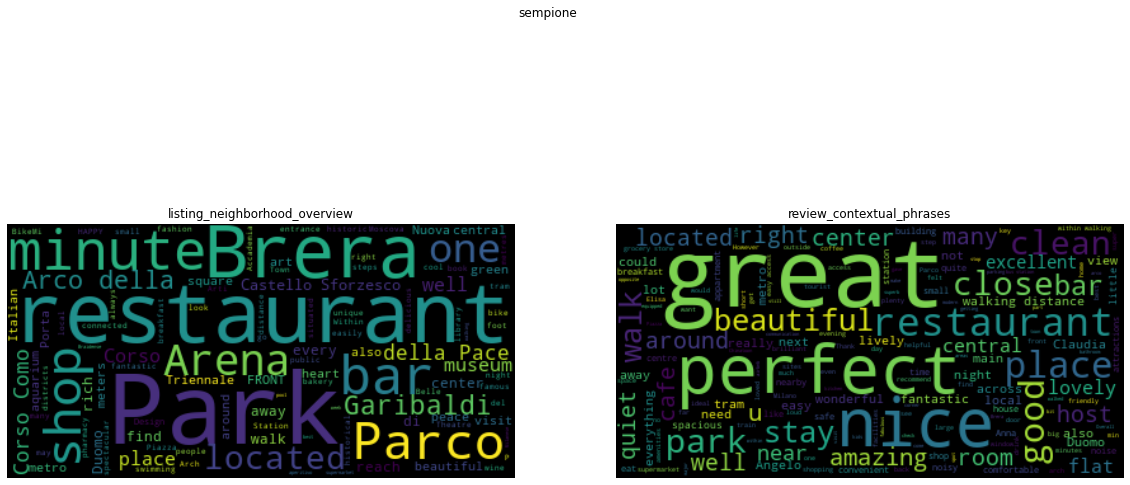

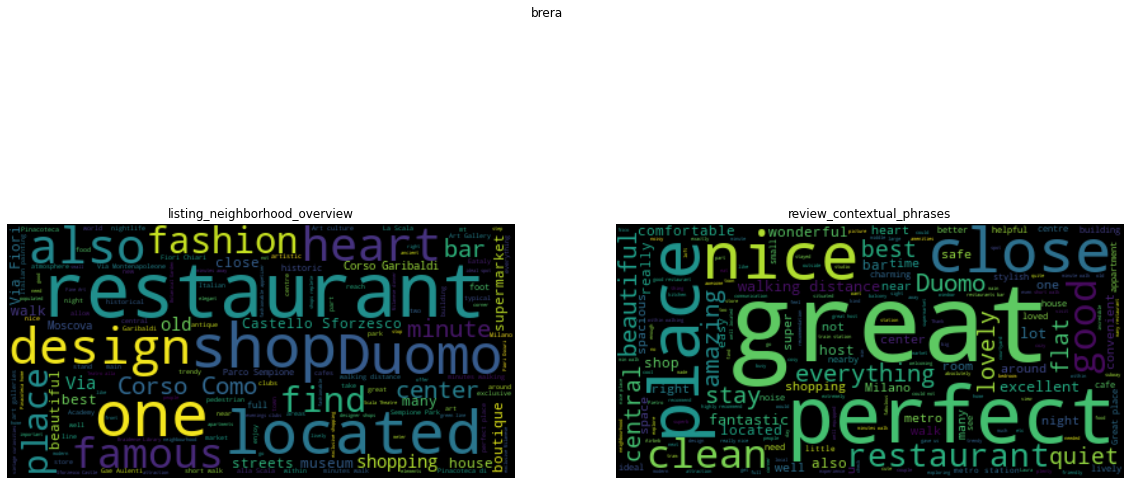

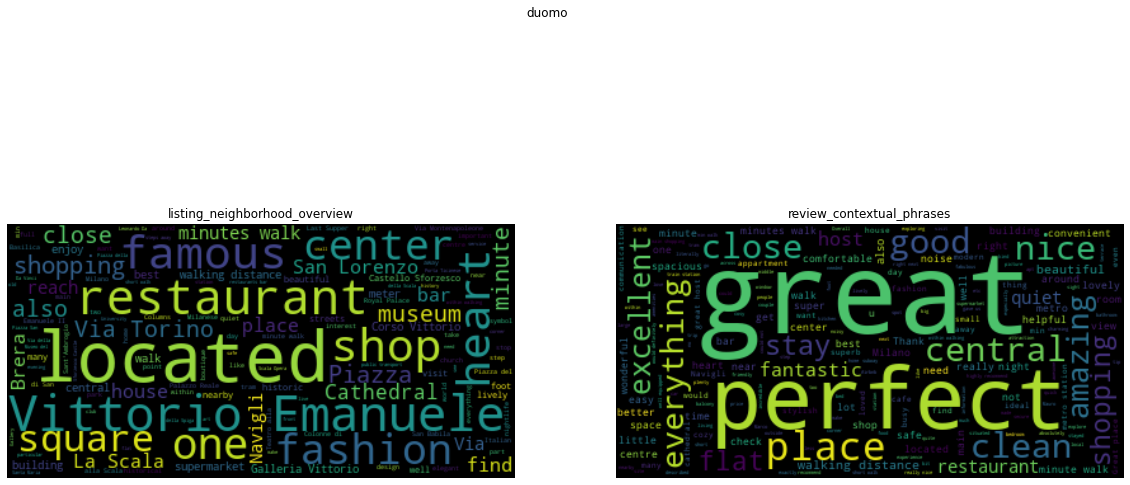

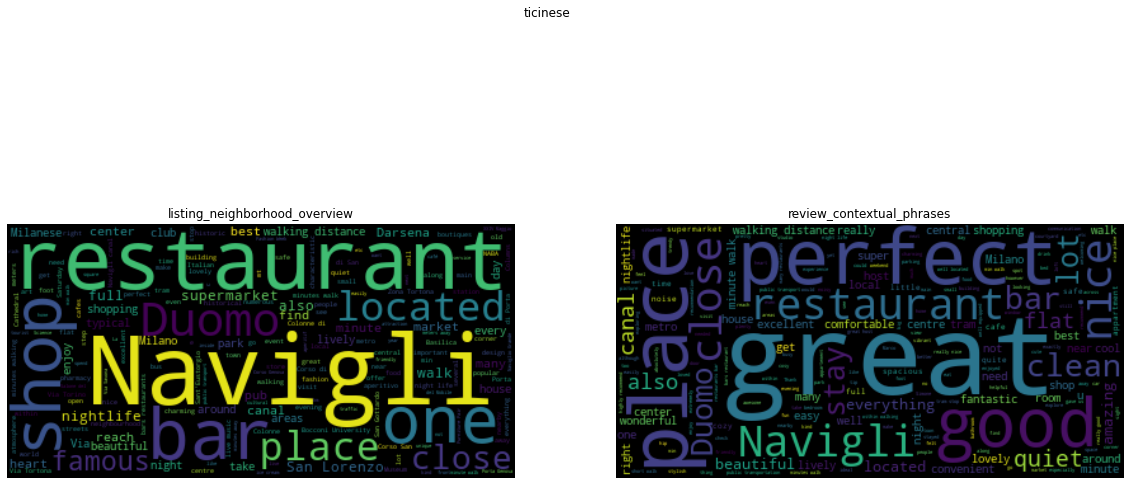

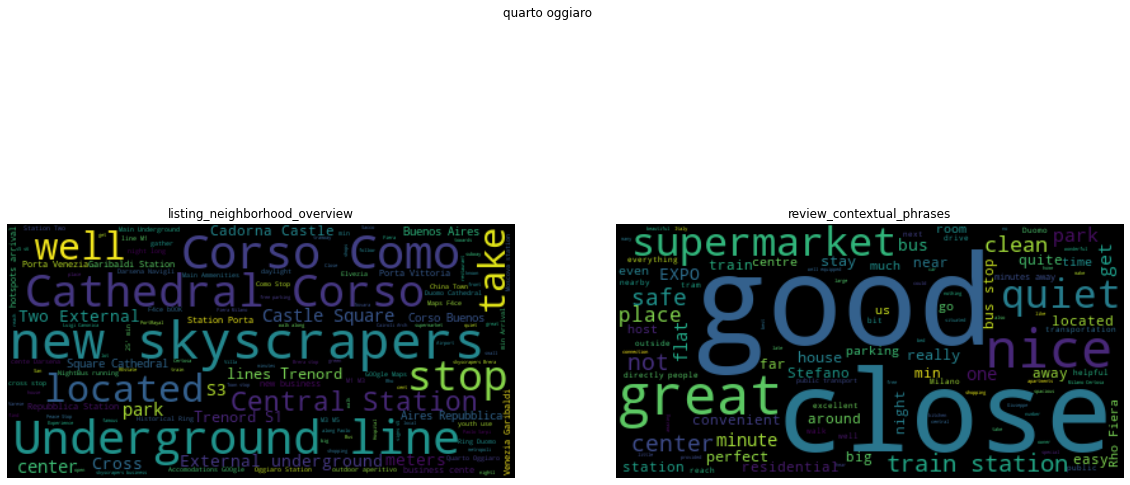

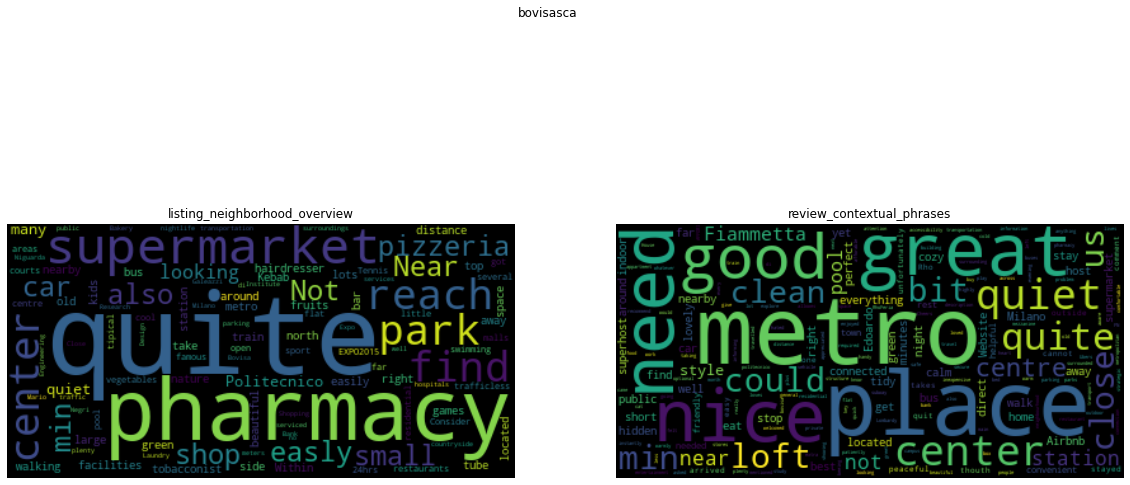

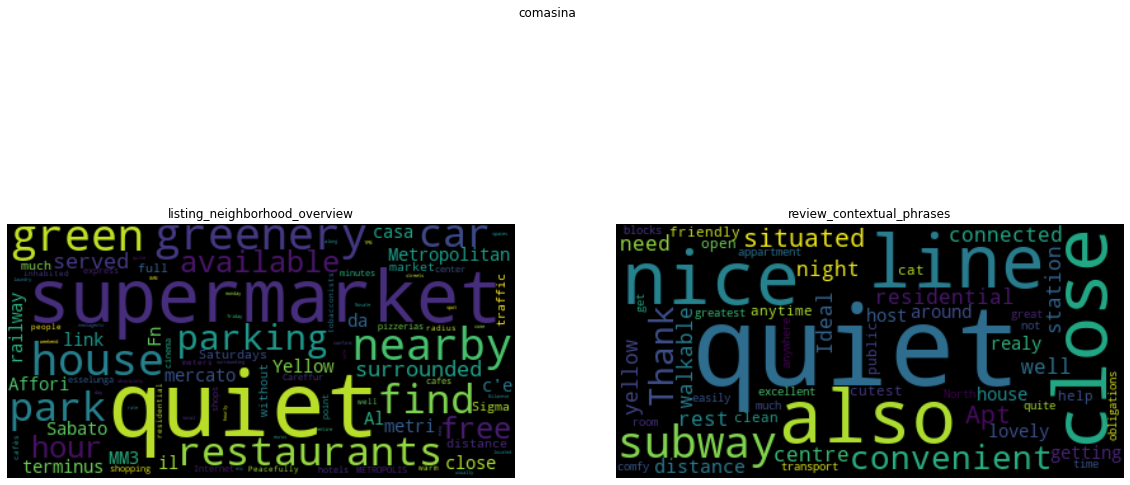

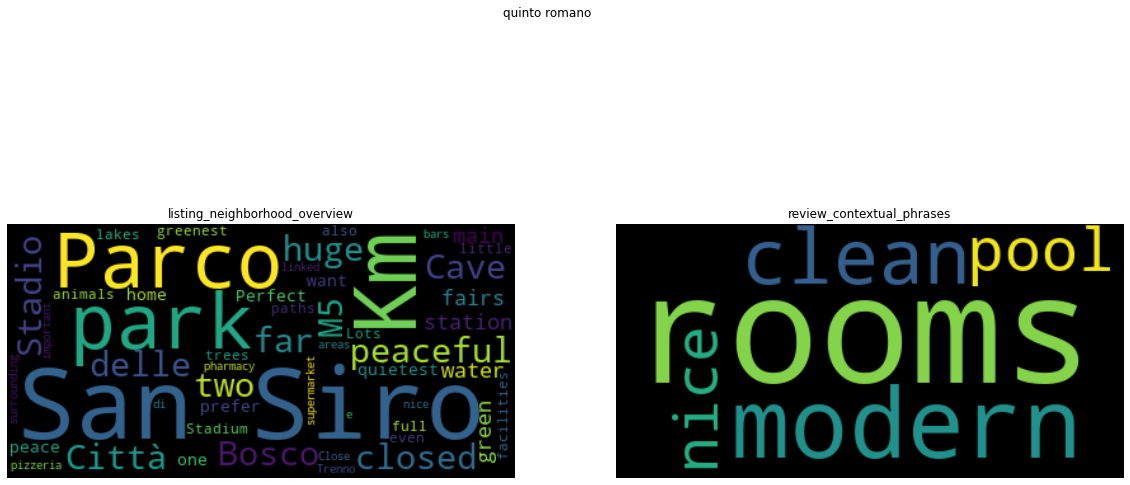

In [129]:
show_neighborhood = [ 'sempione'
                     , 'brera'
                     , 'duomo'
                     , 'ticinese'
                     , 'quarto oggiaro'
                     , 'bovisasca'
                     , 'comasina'
                     , 'quinto romano'
                    ]

for neighborhood in show_neighborhood:
    list_neighborhood_overview = list(df_listings_data_cleaned_eng[df_listings_data_cleaned_eng['real_neighbourhood'] == neighborhood]['neighborhood_overview'])
    string_list_neighborhood_overview = ' '.join(list_neighborhood_overview)
    #print(string_list_neighborhood_overview)

    list_contextual_phrases = list((df_listings_data_cleaned_eng[df_listings_data_cleaned_eng['real_neighbourhood'] == neighborhood]).join(df_reviews_data_cleaned_eng_contains[['listing_id', 'contextual_phrases']].set_index('listing_id'), on = 'id')['contextual_phrases'])
    #print(list_contextual_phrases)
    list_contextual_phrases = [x for x in list_contextual_phrases if str(x) != 'nan']
    string_list_contextual_phrases = ' '.join(list_contextual_phrases)
    #print(string_list_contextual_phrases)

    stop_words = set(stopwords.words('english')) 
    stop_words.update(searched_words_english)
    stop_words.update([neighborhood, 'milan', 'city', 'apartment'])
    stop_words.remove('not')
    stop_words.remove('no')
    stop_words.remove('nor')
    #print(stop_words)
    
    f = plt.figure(figsize = (20, 10))
    f.suptitle(neighborhood)
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.set_title('listing_neighborhood_overview')
    ax.axis("off")

    ax2.set_title('review_contextual_phrases')
    ax2.axis("off")
    
    try:
        wordcloud_neighborhood_overview = WordCloud(stopwords=stop_words).generate(string_list_neighborhood_overview)
        ax.imshow(wordcloud_neighborhood_overview, interpolation='bilinear')
        
        wordcloud_contextual_phrases = WordCloud(stopwords=stop_words).generate(string_list_contextual_phrases)
        ax2.imshow(wordcloud_contextual_phrases, interpolation='bilinear')
    except:
        pass